# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [2]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
IFP=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
IFP.head(20)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                  328   48         521585       17-10-2014           OH   
1                  228   42         342868       27-06-2006           IN   
2                  134   29         687698       06-09-2000           OH   
3                  256   41         227811       25-05-1990           IL   
4                  228   44         367455       06-06-2014           IL   
5                  256   39         104594       12-10-2006           OH   
6                  137   34         413978       04-06-2000           IN   
7                  165   37         429027       03-02-1990           IL   
8                   27   33         485665       05-02-1997           IL   
9                  212   42         636550       25-07-2011           IL   
10                 235   42         543610       26-05-2002           OH   
11                 447   61         214618       29-05-1999           OH   
12                  60   23         842643       20-11-1997           OH   
13                 121   34         626808       26-10-2012           OH   
14                 180   38         644081       28-12-1998           OH   
15                 473   58         892874       19-10-1992           IN   
16                  70   26         558938       08-06-2005           OH   
17                 140   31         275265       15-11-2004           IN   
18                 160   37         921202       28-12-2014           OH   
19                 196   39         143972       02-08-1992           IN   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0     250/500               1000                1406.91               0   
1     250/500               2000                1197.22         5000000   
2     100/300               2000                1413.14         5000000   
3     250/500               2000                1415.74         6000000   
4    500/1000               1000                1583.91         6000000   
5     250/500               1000                1351.10               0   
6     250/500               1000                1333.35               0   
7     100/300               1000                1137.03               0   
8     100/300                500                1442.99               0   
9     100/300                500                1315.68               0   
10    100/300                500                1253.12         4000000   
11    100/300               2000                1137.16               0   
12   500/1000                500                1215.36         3000000   
13    100/300               1000                 936.61               0   
14    250/500               2000                1301.13               0   
15    100/300               2000                1131.40               0   
16   500/1000               1000                1199.44         5000000   
17   500/1000                500                 708.64         6000000   
18   500/1000                500                1374.22               0   
19   500/1000               2000                1475.73               0   

    insured_zip  ... police_report_available total_claim_amount injury_claim  \
0        466132  ...                     YES              71610         6510   
1        468176  ...                       ?               5070          780   
2        430632  ...                      NO              34650         7700   
3        608117  ...                      NO              63400         6340   
4        610706  ...                      NO               6500         1300   
5        478456  ...                      NO              64100         6410   
6        441716  ...                       ?              78650        21450   
7        603195  ...                     YES              51590         9380   
8        601734  ...                     YES              27700         2770   
9        600983  ...           

In [5]:
IFP.shape

(1000, 40)

In [6]:
#Checking for the general data type info
IFP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#checking for null values
IFP.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

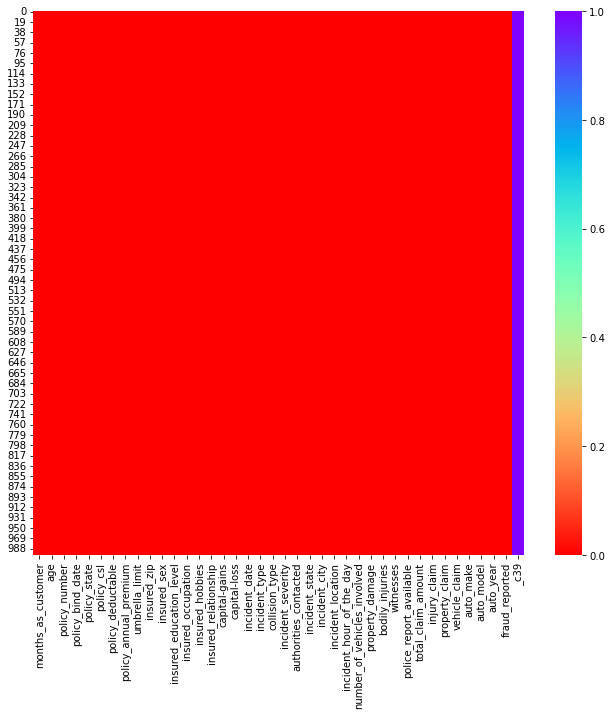

In [8]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(IFP.isna(), cmap='rainbow_r')

In [9]:
#Checking for blank spaces, random characters in each column
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for A in IFP:
    for B in search:
        print(f"{A} in {B} = ",end= " ")
        print((IFP[A] == B).sum())

months_as_customer in   =  0
months_as_customer in ? =  0
months_as_customer in - =  0
months_as_customer in  ? =  0
months_as_customer in  - =  0
months_as_customer in ?  =  0
months_as_customer in -  =  0
months_as_customer in  ?  =  0
months_as_customer in  -  =  0
months_as_customer in NA =  0
months_as_customer in N/A =  0
months_as_customer in  NA =  0
months_as_customer in  N/A =  0
age in   =  0
age in ? =  0
age in - =  0
age in  ? =  0
age in  - =  0
age in ?  =  0
age in -  =  0
age in  ?  =  0
age in  -  =  0
age in NA =  0
age in N/A =  0
age in  NA =  0
age in  N/A =  0
policy_number in   =  0
policy_number in ? =  0
policy_number in - =  0
policy_number in  ? =  0
policy_number in  - =  0
policy_number in ?  =  0
policy_number in -  =  0
policy_number in  ?  =  0
policy_number in  -  =  0
policy_number in NA =  0
policy_number in N/A =  0
policy_number in  NA =  0
policy_number in  N/A =  0
policy_bind_date in   =  0
policy_bind_date in ? =  0
policy_bind_date in - =  0


Column:

'police_report_available' contains 343 '?' character

'property_damage'contains 360 '?' character

'collision_type' contains 178 '?' character

In [10]:
(IFP=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [11]:
IFP.replace({'?': np.nan},inplace=True,) #converting ' ?' to NaN values

In [12]:
IFP.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
IFP.drop(columns=['_c39'])

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                     NaN               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                     NaN              87200   
996       608177  ...         3                     NaN             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                     NaN               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

# This is a Classification Problem since the Target variable / Label column ("fraud_reported") has Catergorical type of Data.

In [14]:
#Analyzing the Target Class
IFP['fraud_reported'].unique() 

array(['Y', 'N'], dtype=object)

In [15]:
#There are 2 unique catergorical values in the Label column / target variable.
77

77

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

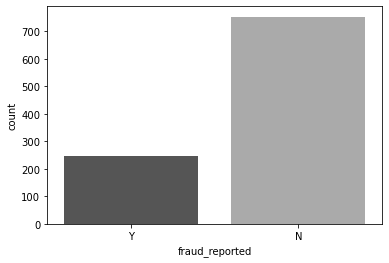

In [16]:
sns.countplot(IFP['fraud_reported'], palette="binary_r")

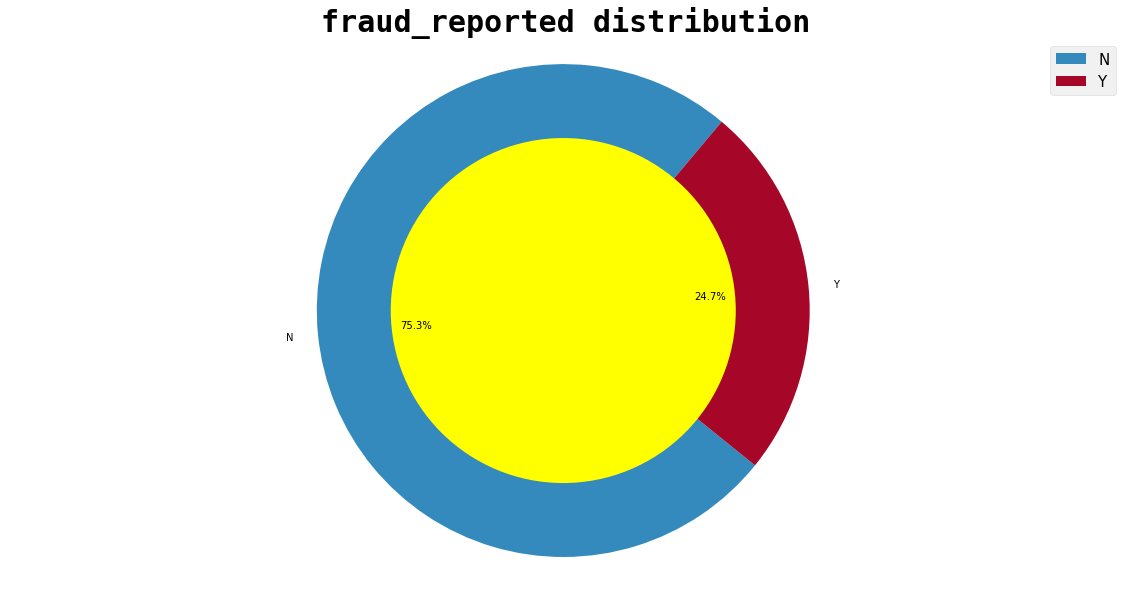

In [17]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for ['fraud_reported']
relation = IFP['fraud_reported'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('fraud_reported distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

Classes are imbalanced.

In [18]:
import sklearn
sklearn.__version__

'0.24.2'

In [19]:
!pip install scikit-learn

In [20]:
#Checking for unique categories in the categorical columns with null values
IFP.collision_type.unique() 

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

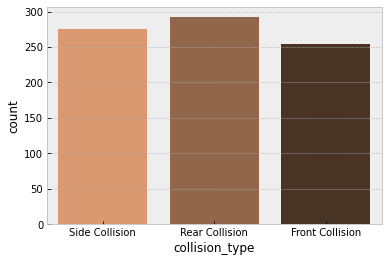

In [21]:

sns.countplot(IFP['collision_type'], palette="copper_r")

In [22]:
IFP.collision_type.mode() #most frequently occuring value.

0    Rear Collision
dtype: object

In [23]:

from sklearn.impute import SimpleImputer

In [24]:

si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 1 )

In [25]:
si = si.fit(IFP[['collision_type']])

In [26]:
IFP[['collision_type']] = si.transform(IFP[['collision_type']])

In [27]:
IFP[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [28]:
#PROPERTY DAMAGE
IFP.property_damage.unique() 

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

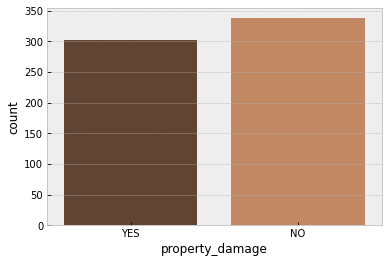

In [29]:
sns.countplot(IFP['property_damage'], palette="copper")

In [30]:
IFP.property_damage.mode() #most frequently occuring value.

0    NO
dtype: object

In [31]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 1 )

In [32]:
si = si.fit(IFP[['property_damage']])

In [33]:
IFP[['property_damage']] = si.transform(IFP[['property_damage']])

In [34]:
IFP[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [35]:
#police_report_available
IFP.police_report_available.unique() 

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

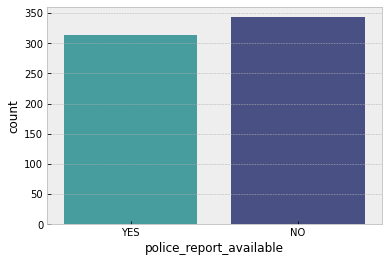

In [36]:
sns.countplot(IFP['police_report_available'], palette="mako_r")

In [37]:
IFP.police_report_available.mode() #most frequently occuring value.

0    NO
dtype: object

In [38]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 1 )
si = si.fit(IFP[['police_report_available']])
IFP[['police_report_available']] = si.transform(IFP[['police_report_available']])
IFP[['police_report_available']].isnull().sum()

police_report_available    0
dtype: int64

In [39]:
IFP.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no more null values in the dataset.

In [40]:
#Getting the basic summary and statistical information of the data.
IFP.nunique() #analysing unique values in each column

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [41]:
IFP.dtypes[IFP.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [42]:
IFP.dtypes[IFP.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
_c39                           float64
dtype: object

In [43]:
IFP.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

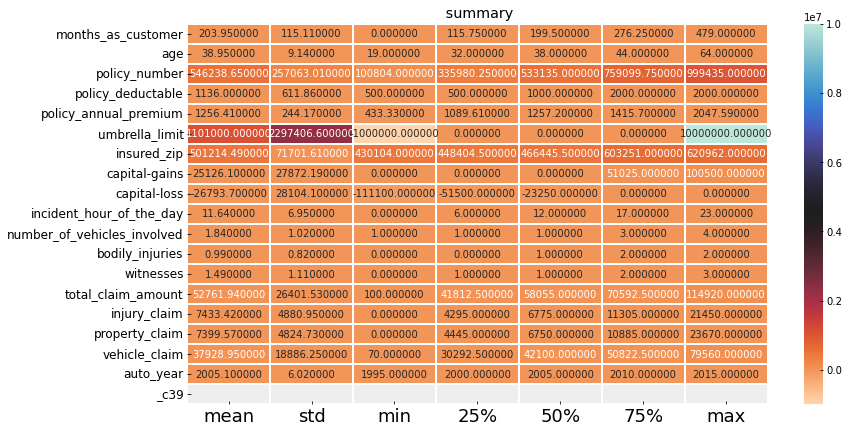

In [44]:
plt.figure(figsize=(13,7))
sns.heatmap(round(IFP.describe()[1:].transpose(),2), linewidth =2, fmt='f', annot=True, cmap='icefire_r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title(' summary')
plt.show()

# Analyzing Feature columns Catergorical Classes

In [45]:
IFP.dtypes[IFP.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [46]:
IFP['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [47]:
#policy_state
IFP['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

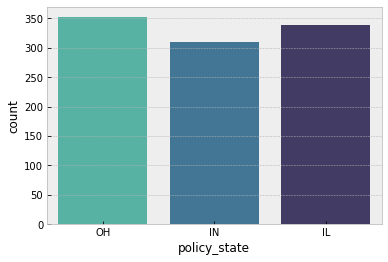

In [48]:
sns.countplot(IFP['policy_state'], palette="mako_r")

In [49]:
#policy_csl
IFP['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

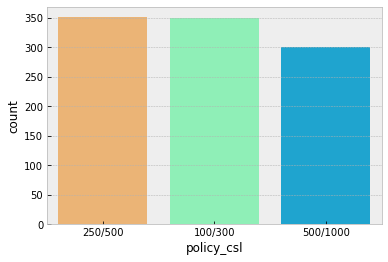

In [50]:
sns.countplot(IFP['policy_csl'], palette="rainbow_r")

In [51]:
#insured_sex
IFP['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

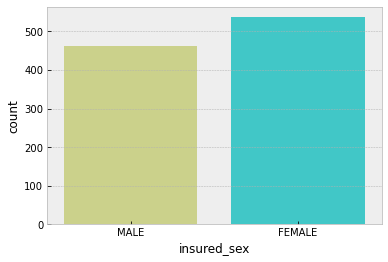

In [52]:
sns.countplot(IFP['insured_sex'], palette="rainbow_r")

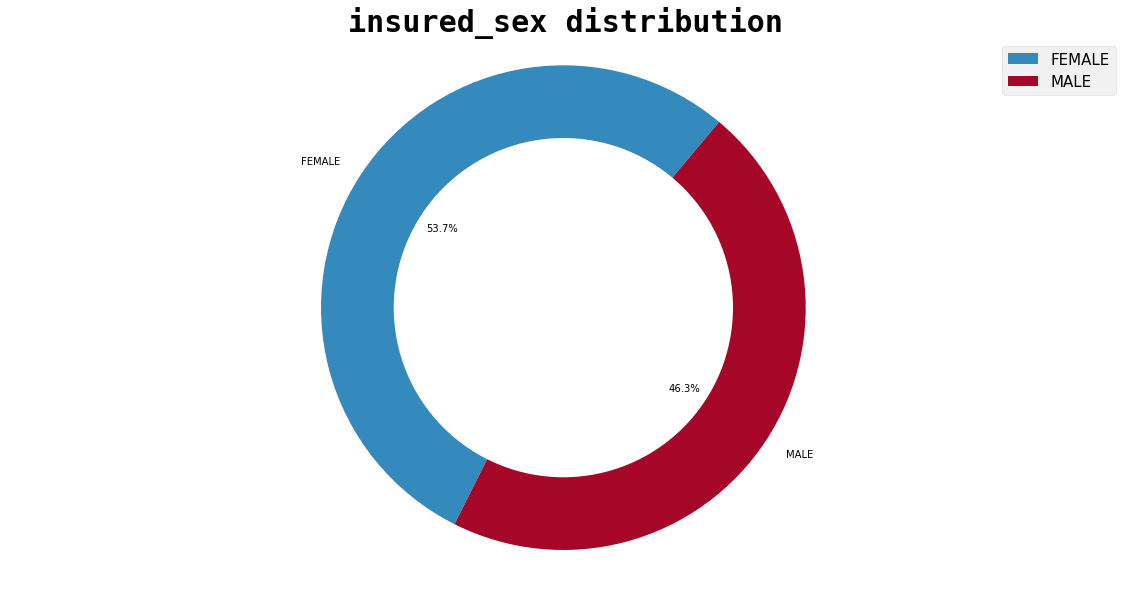

In [53]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'insured_sex'
relation = IFP['insured_sex'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('insured_sex distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [54]:
#insured_education_level
IFP['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

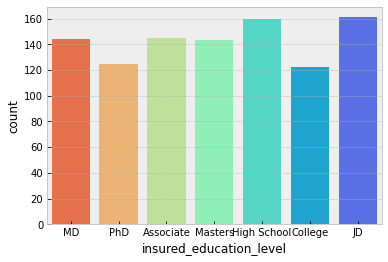

In [55]:
sns.countplot(IFP['insured_education_level'], palette="rainbow_r")

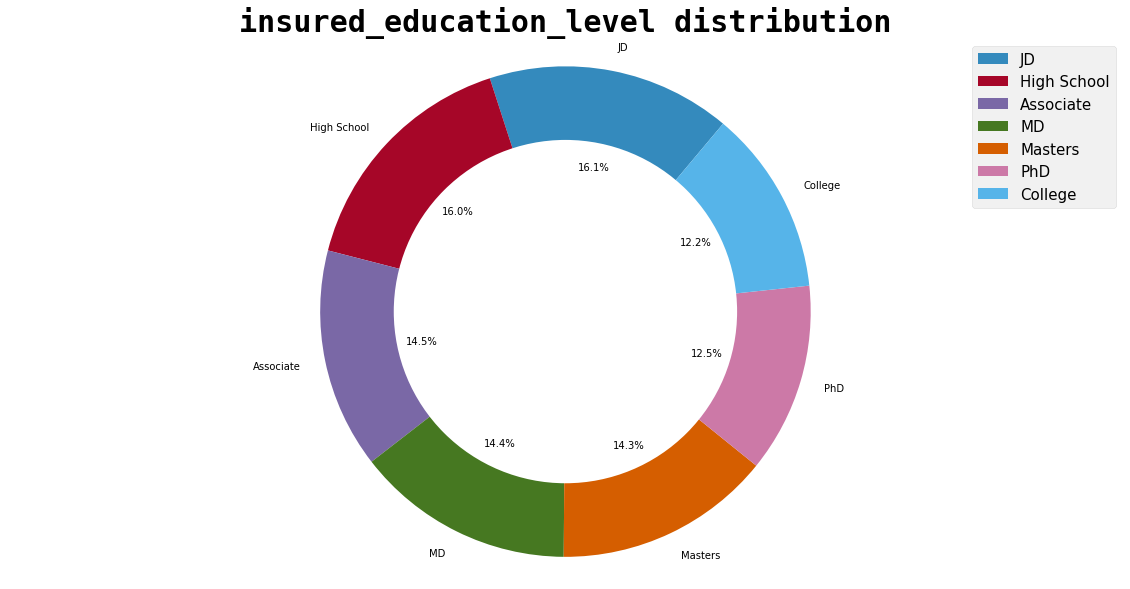

In [56]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'insured_education_level'
relation = IFP['insured_education_level'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('insured_education_level distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [57]:
#insured_occupatioN
IFP['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

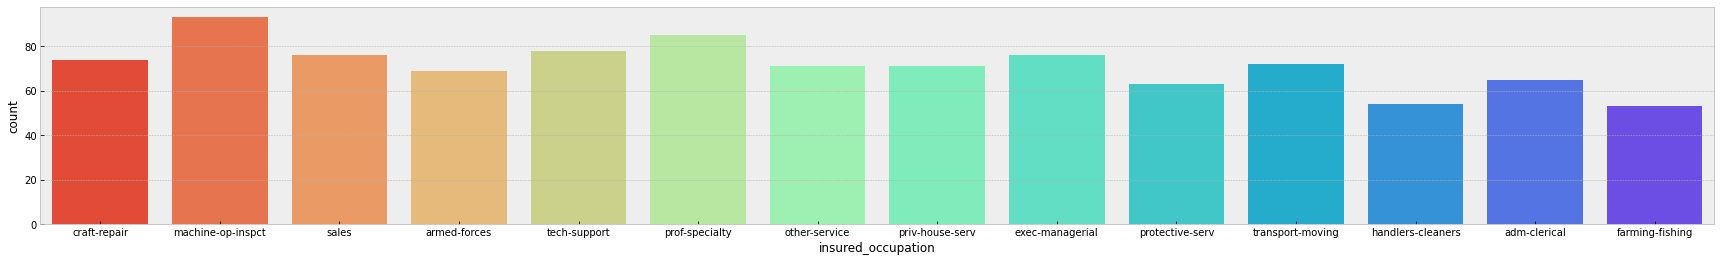

In [58]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IFP['insured_occupation'], palette="rainbow_r")

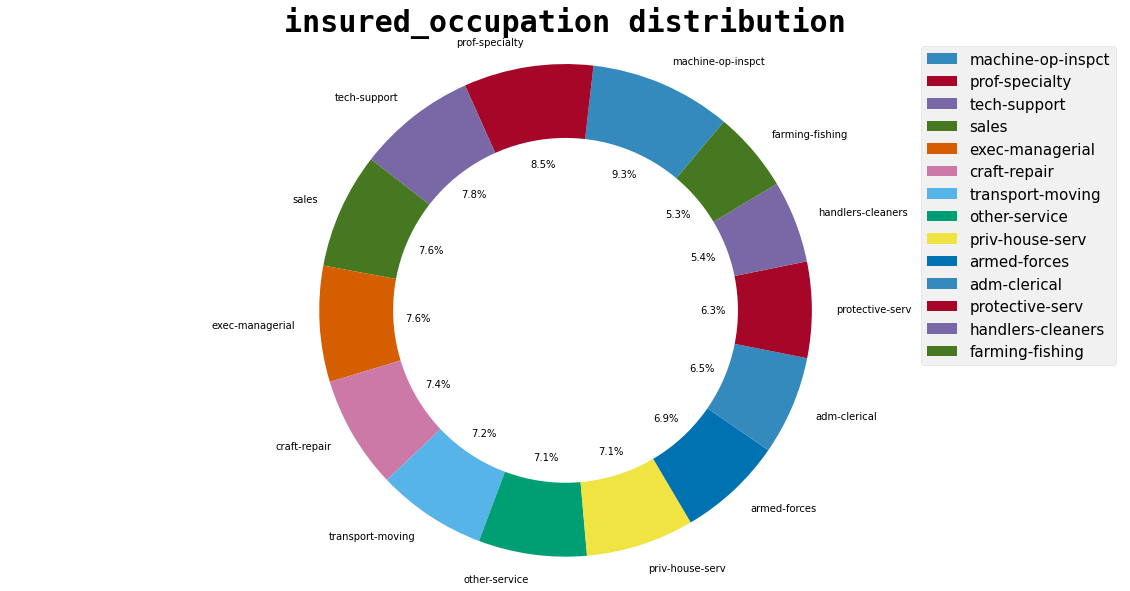

In [59]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'insured_occupation'
relation = IFP['insured_occupation'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('insured_occupation distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [60]:
#insured_hobbies
IFP['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

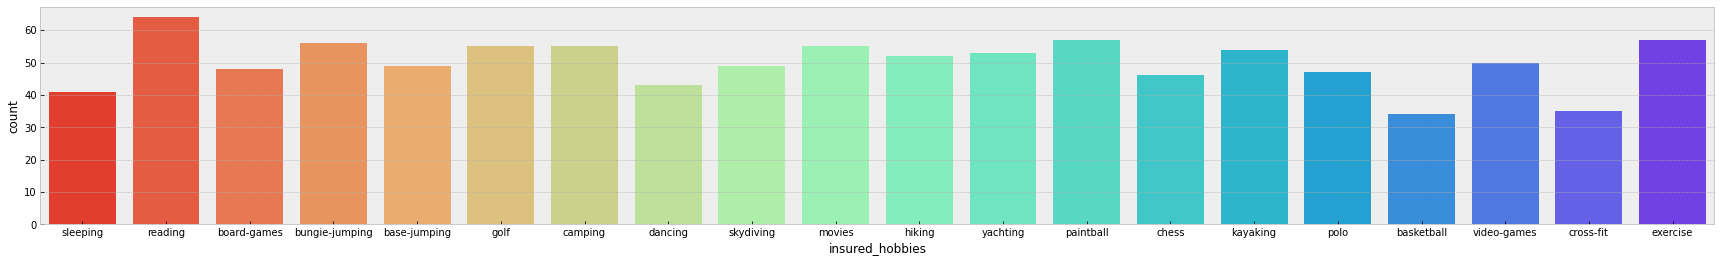

In [61]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IFP['insured_hobbies'], palette="rainbow_r")

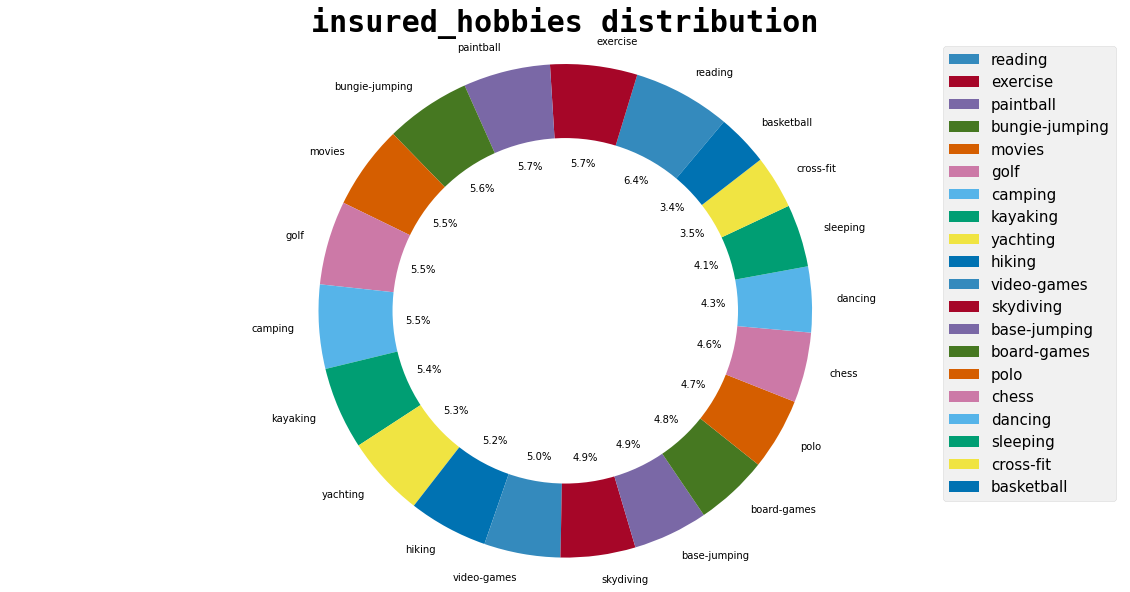

In [62]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'insured_hobbies'
relation = IFP['insured_hobbies'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('insured_hobbies distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [63]:
#incident_date
IFP['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

<AxesSubplot:xlabel='incident_date', ylabel='count'>

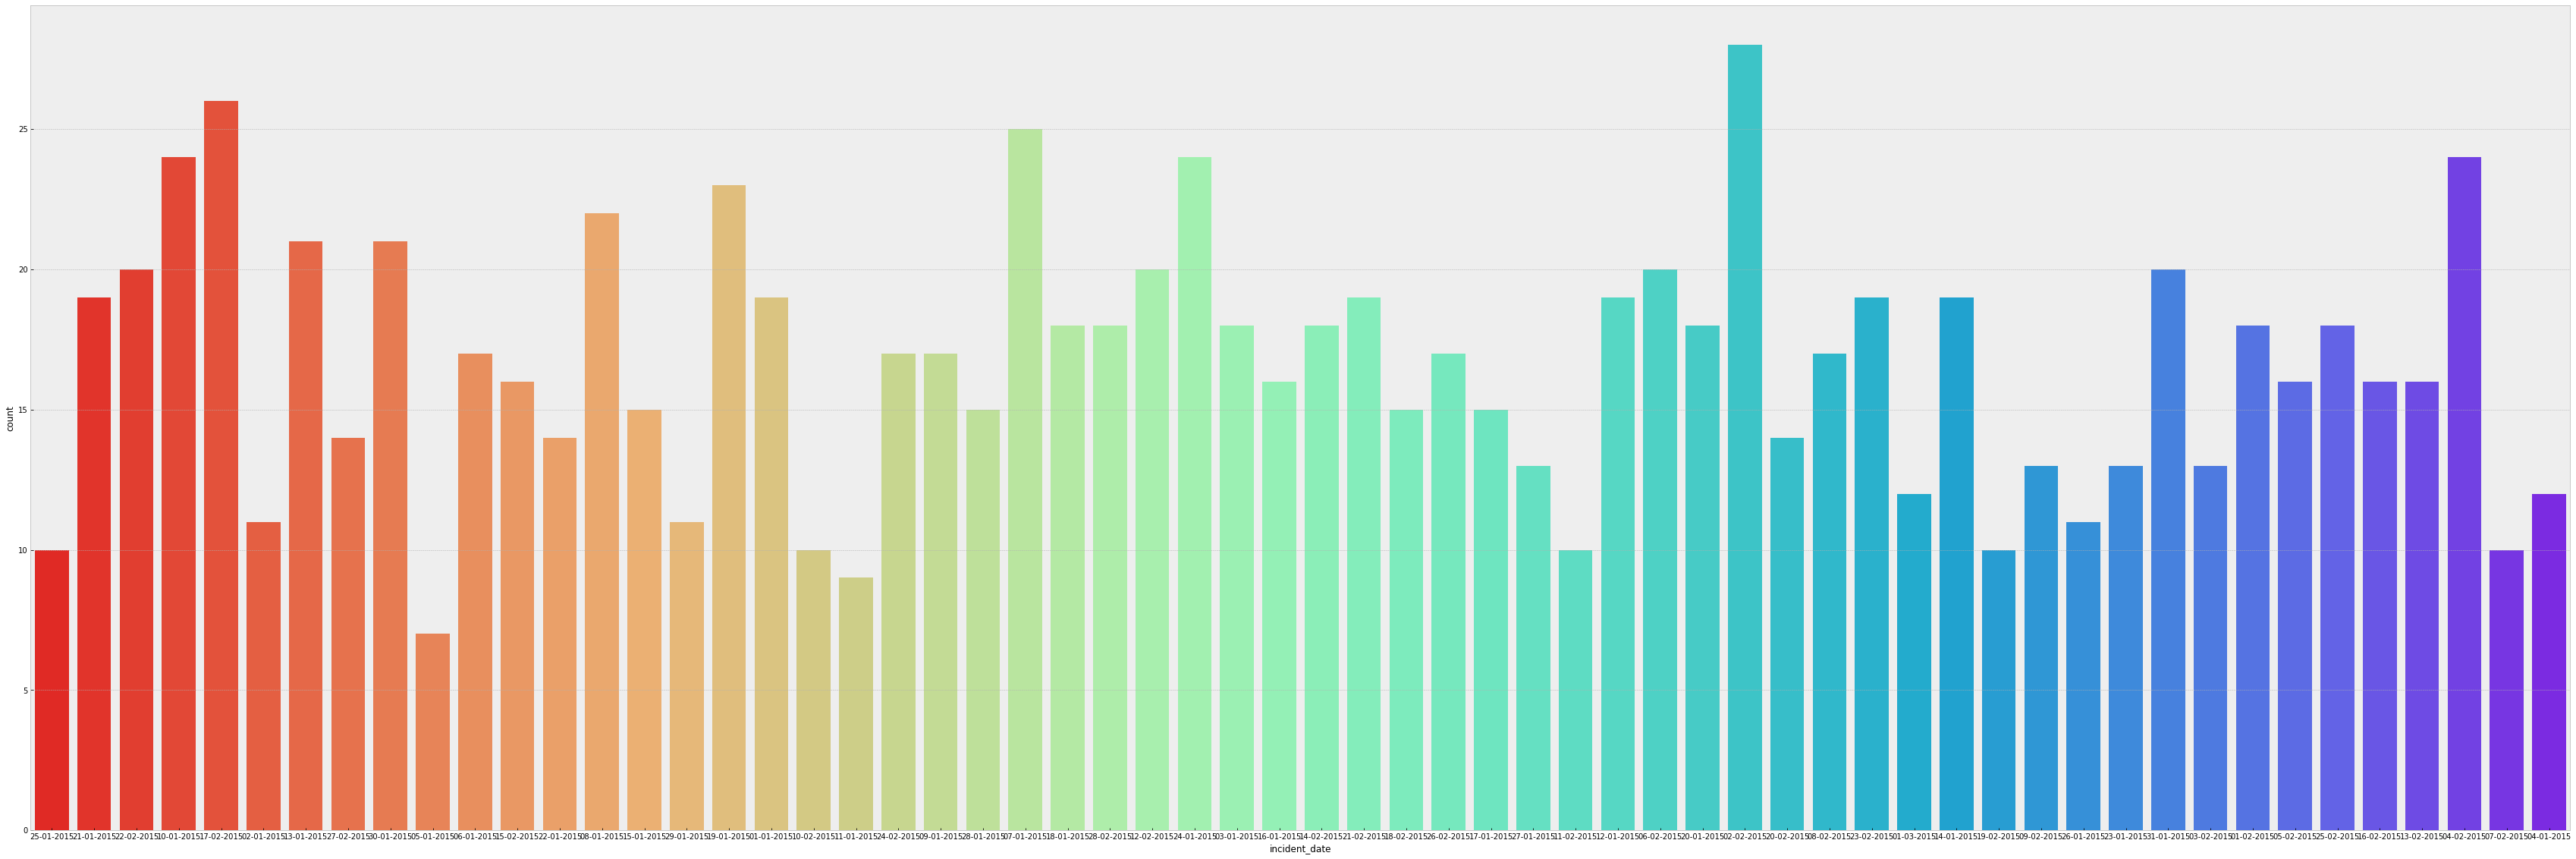

In [64]:
plt.figure(figsize=(60,20),facecolor='white')
sns.countplot(IFP['incident_date'], palette="rainbow_r")

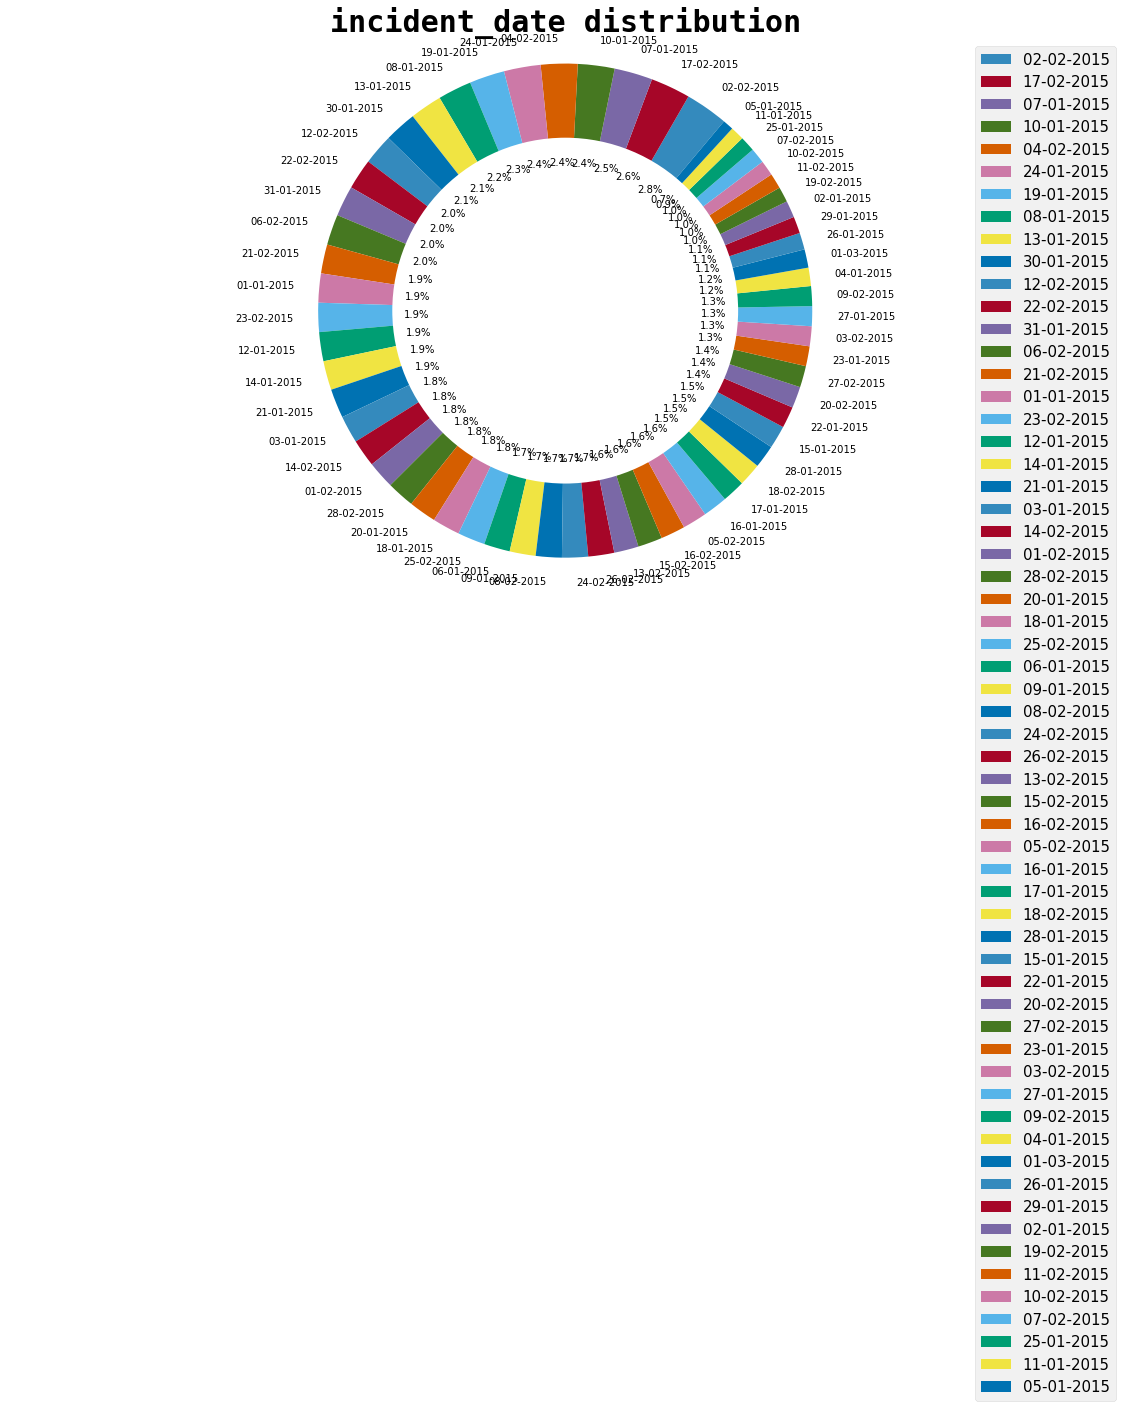

In [65]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'incident_date'
relation = IFP['incident_date'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('incident_date distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [66]:
#Extracting Incident Month from incident_date

IFP['incident_date']=pd.to_datetime(IFP['incident_date']) #creating datetime type dataframe

In [67]:
IFP['incident_month']=IFP['incident_date'].apply(lambda m:m.month) #mapping month values to 'incident_month' column in main dataframe
IFP.drop(columns=['incident_date'],inplace=True) # dropping auto_year since it is no longer needed

In [68]:
IFP.sample(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
168                 276   46         140880       29-03-2005           IL   
851                 282   43         982678       19-07-2006           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
168    250/500                500                1448.84               0   
851    250/500                500                1452.27               0   

     insured_zip  ... total_claim_amount injury_claim property_claim  \
168       430987  ...               5940          660            660   
851       611996  ...              46800         4680           9360   

    vehicle_claim auto_make  auto_model  auto_year fraud_reported _c39  \
168          4620    Toyota  Highlander       2015              N  NaN   
851         32760      Audi          A5       2007              Y  NaN   

    incident_month  
168              2  
851              8  

[2 rows x 40 columns]

In [69]:
#incident_type
IFP['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

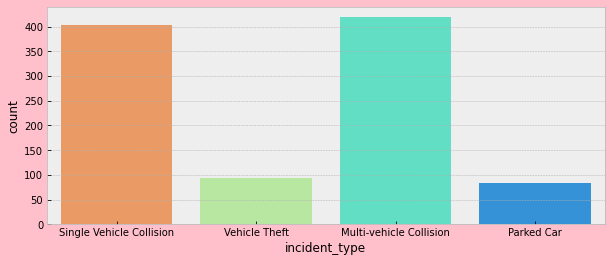

In [70]:
plt.figure(figsize=(10,4),facecolor='pink')
sns.countplot(IFP['incident_type'], palette="rainbow_r")

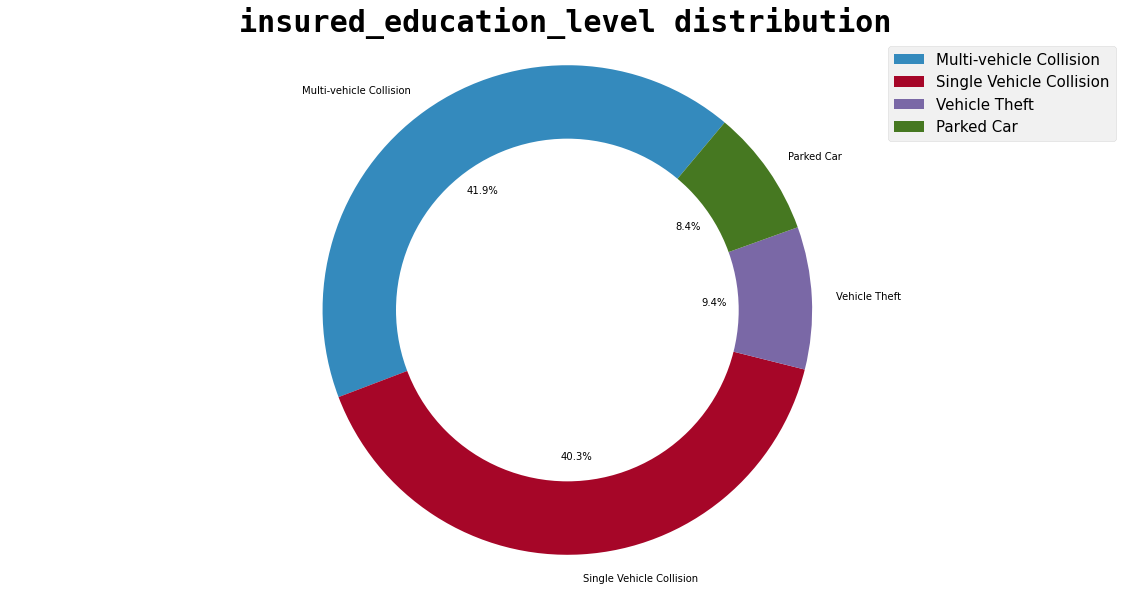

In [71]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'incident_type'
relation = IFP['incident_type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('insured_education_level distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [72]:
#collision_type
IFP['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

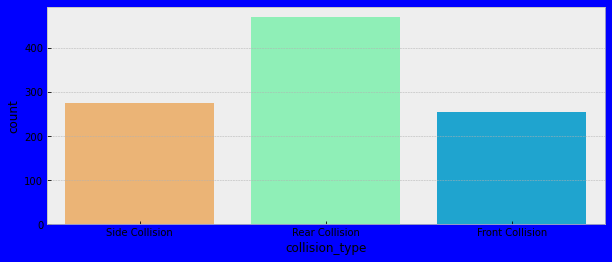

In [73]:
plt.figure(figsize=(10,4),facecolor='blue')
sns.countplot(IFP['collision_type'], palette="rainbow_r")

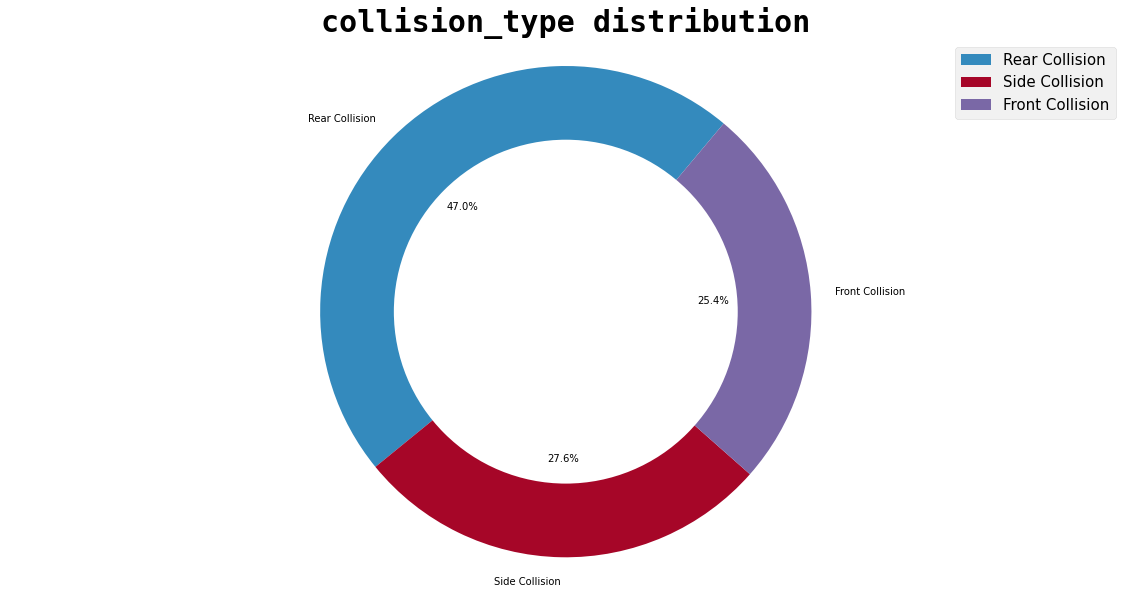

In [74]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'collision_type'
relation = IFP['collision_type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('collision_type distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [75]:
#incident_severity
IFP['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

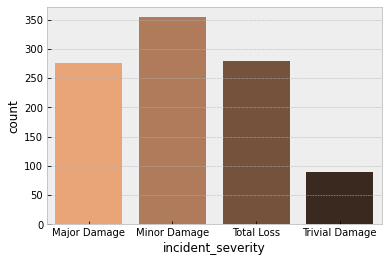

In [76]:
sns.countplot(IFP['incident_severity'], palette="copper_r")

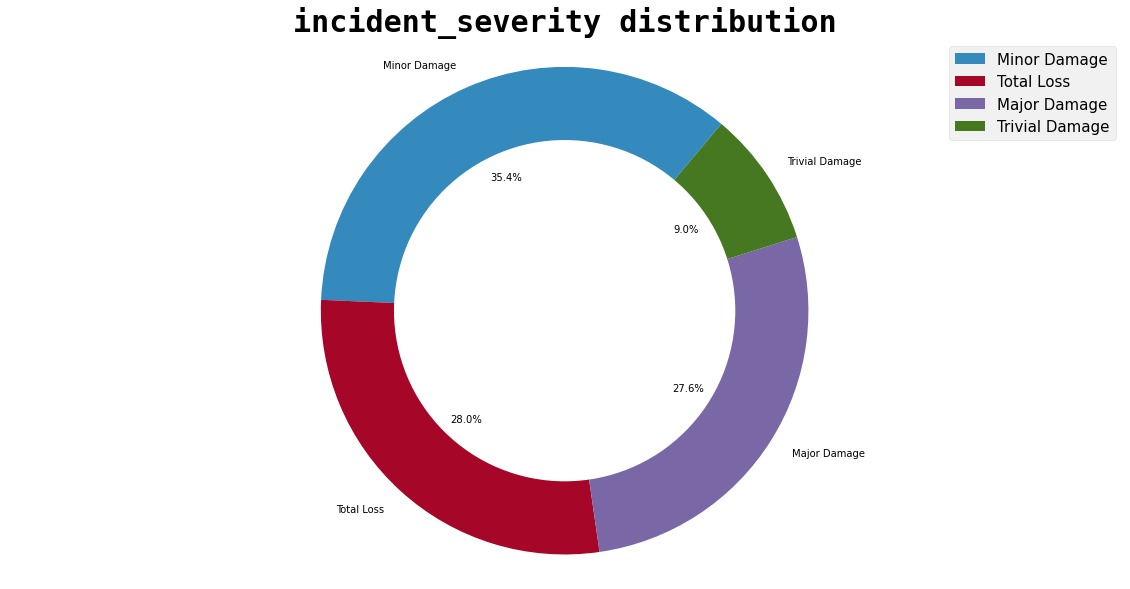

In [77]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'incident_severity'
relation = IFP['incident_severity'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('incident_severity distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [78]:
#authorities_contacted
IFP['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

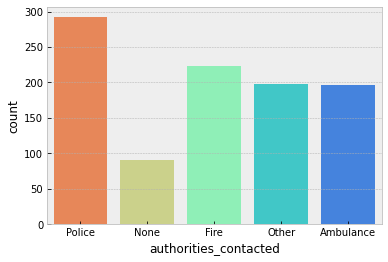

In [79]:

sns.countplot(IFP['authorities_contacted'], palette="rainbow_r")

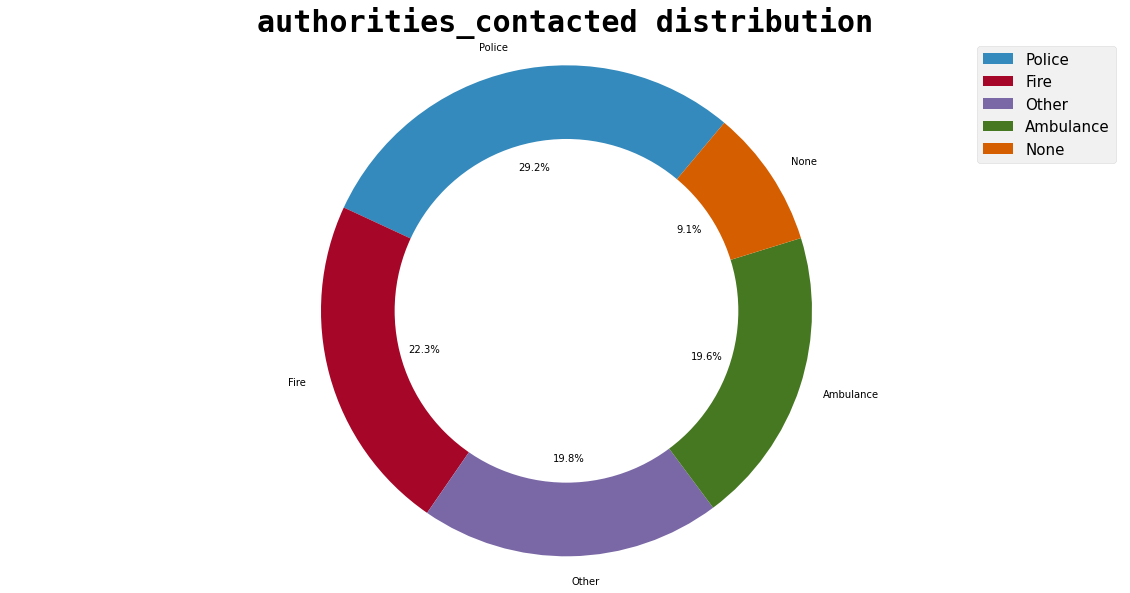

In [80]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'authorities_contacted'
relation = IFP['authorities_contacted'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('authorities_contacted distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [81]:
#incident_state
IFP['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

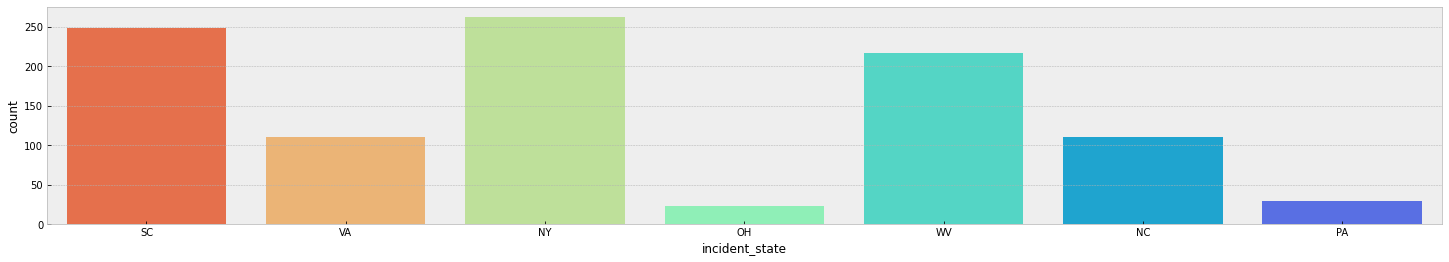

In [82]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(IFP['incident_state'], palette="rainbow_r")

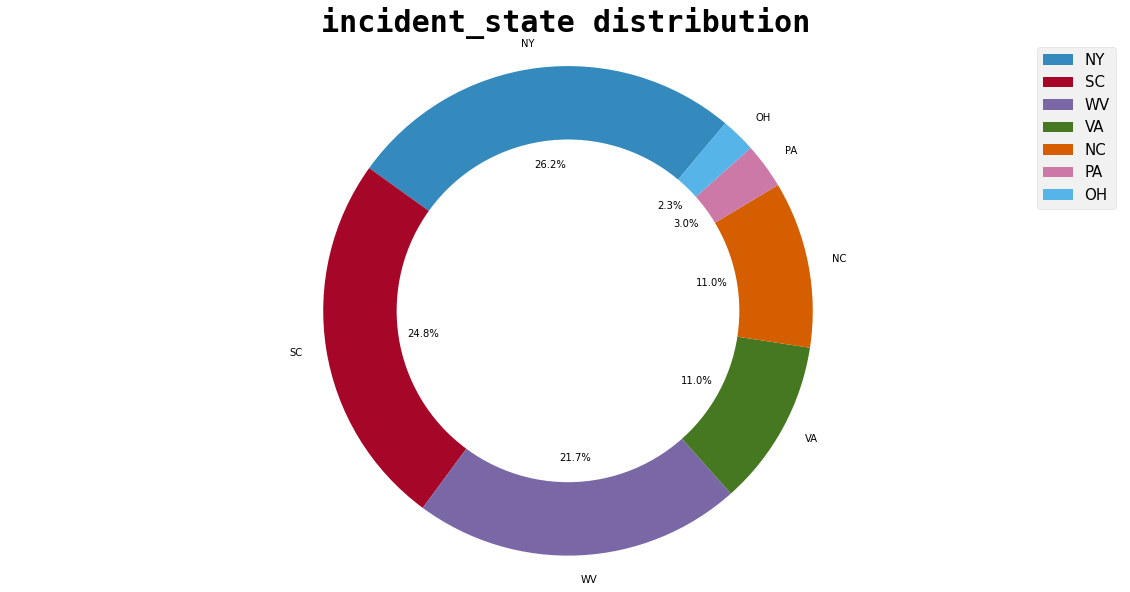

In [83]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'incident_state'
relation = IFP['incident_state'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('incident_state distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [84]:
#incident_city
IFP['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

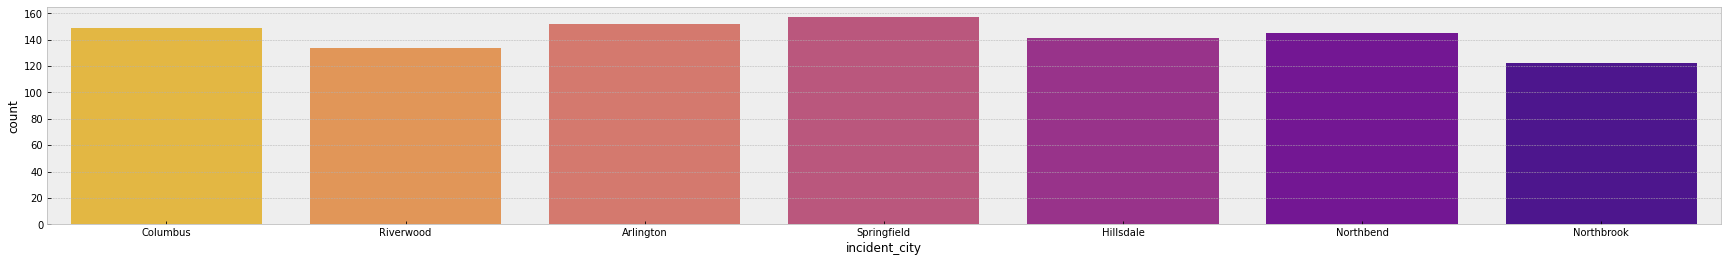

In [85]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IFP['incident_city'], palette="plasma_r")

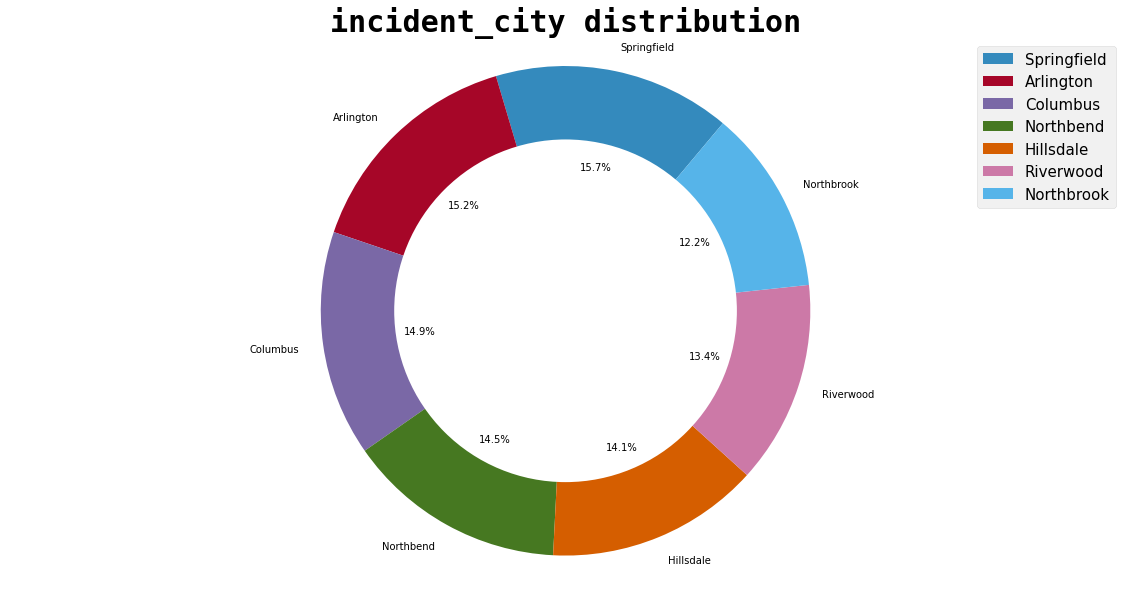

In [86]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'incident_city'
relation = IFP['incident_city'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('incident_city distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [87]:
#incident_location
IFP['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [88]:
#property_damage
IFP['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

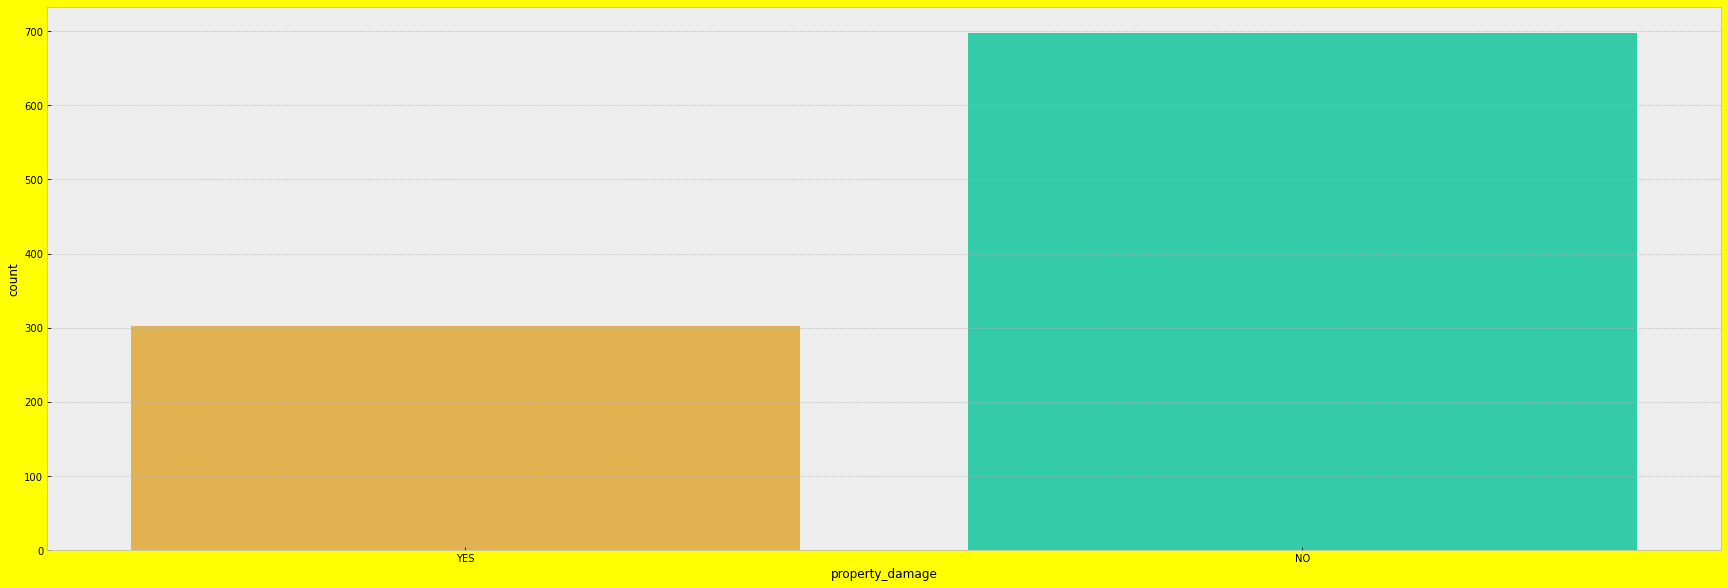

In [89]:
plt.figure(figsize=(30,10),facecolor='yellow')
sns.countplot(IFP['property_damage'], palette="turbo_r")

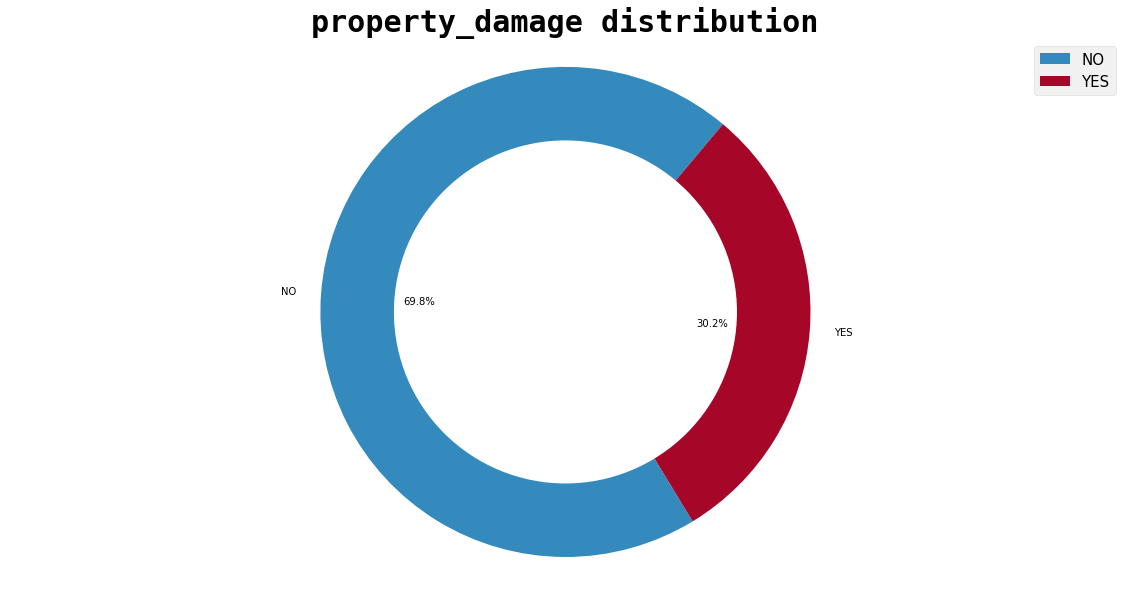

In [90]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'property_damage'
relation = IFP['property_damage'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('property_damage distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [91]:
#police_report_available
IFP['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

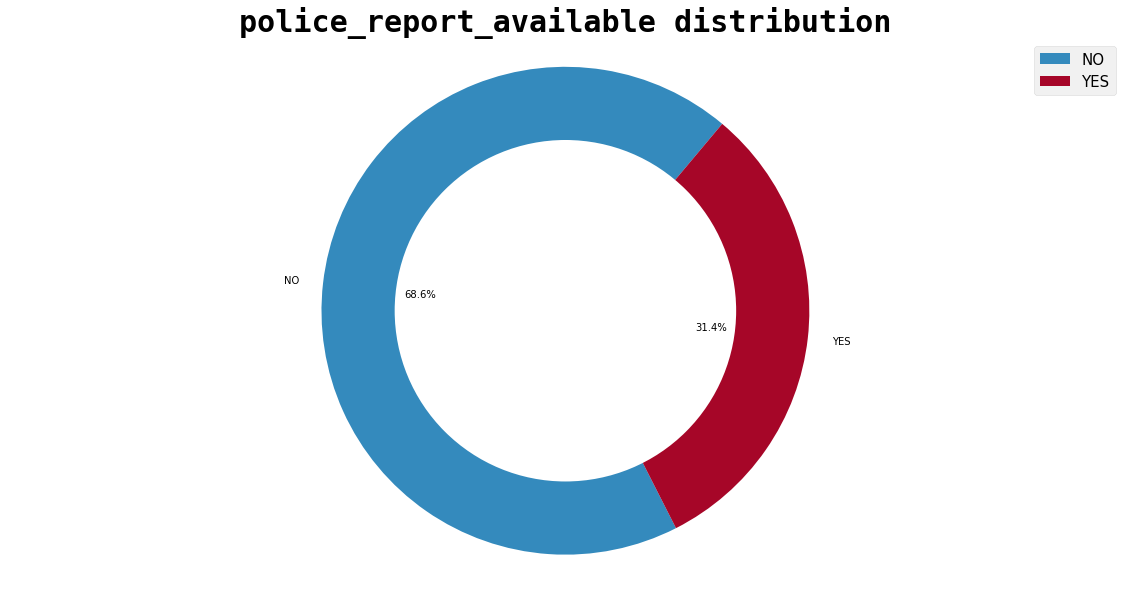

In [92]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'police_report_available'
relation = IFP['police_report_available'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('police_report_available distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [93]:
#auto_make
IFP['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

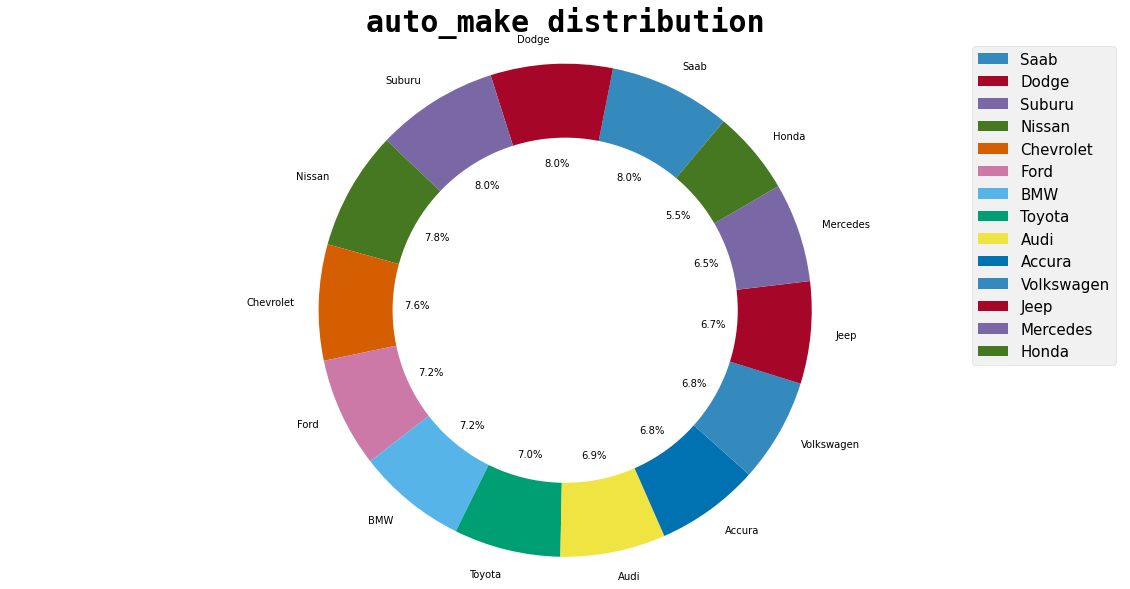

In [94]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'IFP['auto_make']'
relation = IFP['auto_make'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('auto_make distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='auto_make', ylabel='count'>

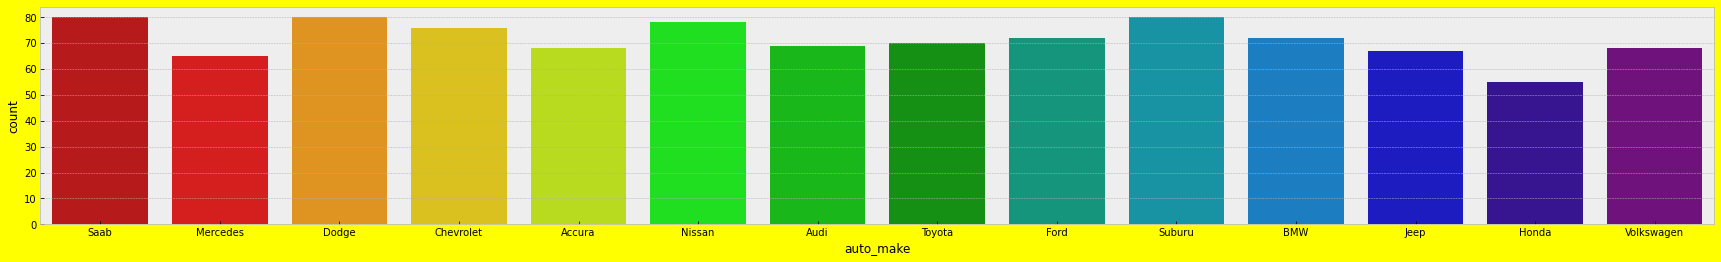

In [95]:
plt.figure(figsize=(30,4),facecolor='yellow')
sns.countplot(IFP['auto_make'], palette="nipy_spectral_r")

In [96]:
#auto_model
IFP['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

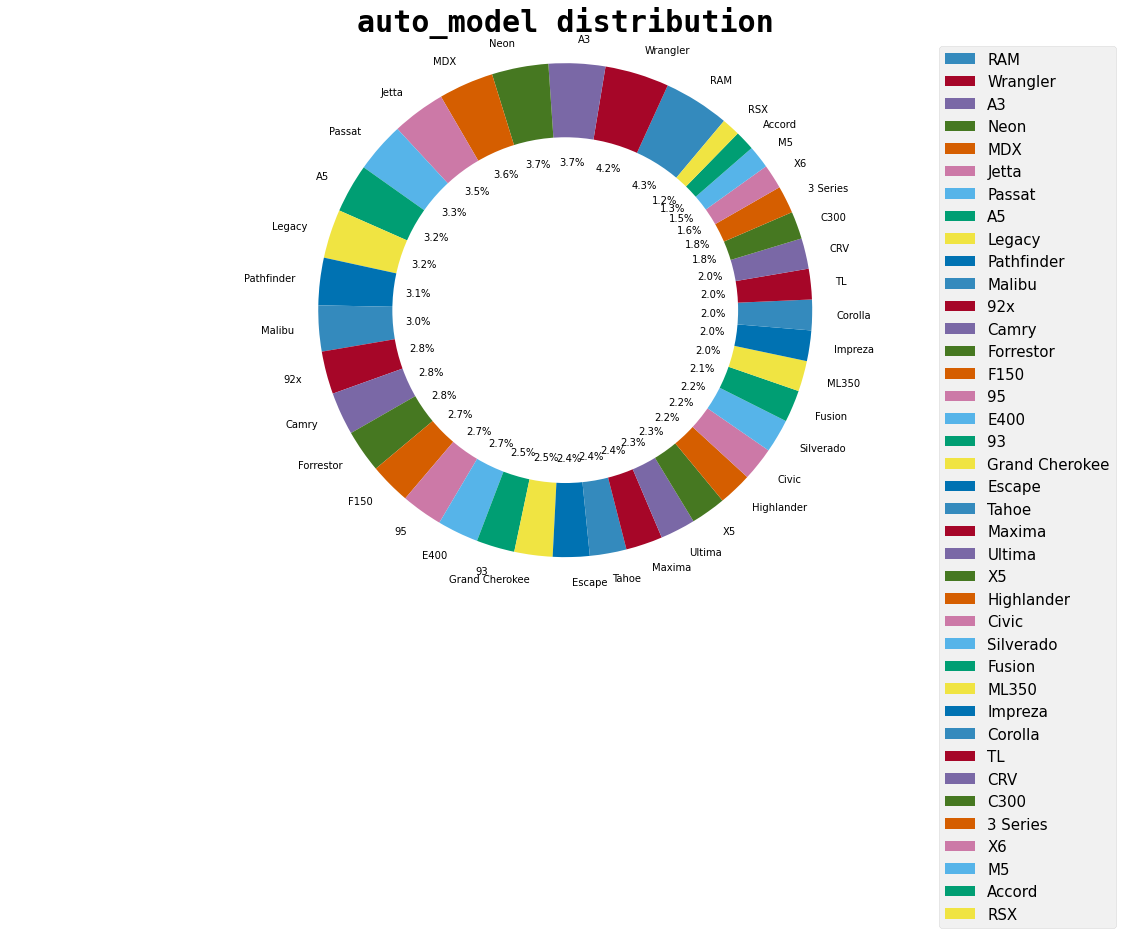

In [97]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'IFP['auto_model']'
relation = IFP['auto_model'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('auto_model distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

<AxesSubplot:xlabel='auto_make', ylabel='count'>

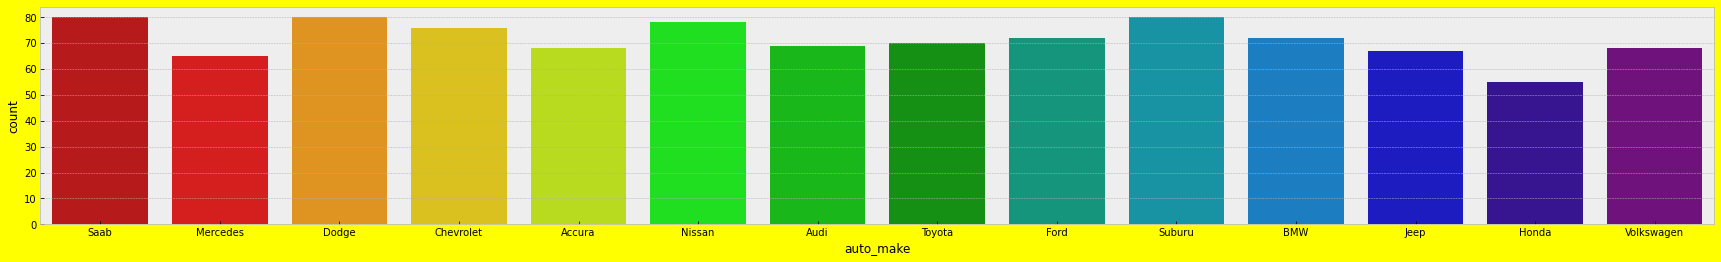

In [98]:
plt.figure(figsize=(30,4),facecolor='yellow')
sns.countplot(IFP['auto_make'], palette="nipy_spectral_r")

In [99]:
#policy_bind_date
IFP['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [100]:
#Extracting 'year' from policy_bind_date
IFP['policy_bind_date']=pd.to_datetime(IFP['policy_bind_date']) #creating datetime type dataframe
IFP['Bind_Year']=IFP['policy_bind_date'].apply(lambda y:y.year) #mapping year values to 'Year' column in main dataframe
IFP.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  fraud_reported _c39 incident_month Bind_Year  
0        92x       2004               Y  NaN              1      2014  
1       E400       2007               Y  NaN              1      2006  
2        RAM       2007               N  NaN              2      2000  
3      Tahoe       2014               Y  NaN             10      1990  
4        RSX       2009               N  NaN              2      2014  

[5 rows x 41 columns]

In [101]:
#Dropping the column 'policy_bind_date' since it is no longer needed.

IFP.drop(columns = ['policy_bind_date'],inplace = True)
IFP.Bind_Year.max() # finding the most recent bind year

2015

In [102]:
#Extracting 'Age' of policy bind from bind_year
IFP['Bind_Age'] = IFP['Bind_Year'].apply(lambda y: 2016 - y)
IFP

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... property_claim vehicle_claim   auto_make auto_model  \
0          MALE  ...          13020         52080        Saab        92x   
1          MALE  ...            780          3510    Mercedes       E400   
2        FEMALE  ...           3850         23100       Dodge        RAM   
3        FEMALE  ...           6340         50720   Chevrolet      Tahoe   
4          MALE  ...            650          4550      Accura        RSX   
..          ...  ...            ...           ...         ...        ...   
995      FEMALE  ...           8720         61040       Honda     Accord   
996      FEMALE  ...          18080         72320  Volkswagen     Passat   
997      FEMALE  ...           7500         52500      Suburu    Impreza   
998        MALE  ...           5220         36540        Audi         A5   
999      FEMALE  ...            920          3680    Mercedes       E400   

     auto_year  fraud_reported _c39 incident_month Bind_Year Bind_Age  
0         2004               Y  NaN              1      2014        2  
1         2007               Y  NaN              1      2006       10  
2         2007               N  NaN              2      2000       16  
3         2014               Y  NaN             10      1990       26  
4         2009               N  NaN              2      2014        2  
..         ...             ...  ...            ...       ...      ...  
995       2006               N  NaN              2      1991       25  
996       2015               N  NaN              1      2014        2  
997       1996               N  NaN              1      2003       13  
998       1998               N  NaN              2      2011        5  
999       2007               N  NaN              2      1996       20  

[1000 rows x 41 columns]

In [103]:
IFP.drop(columns = ['Bind_Year'],inplace = True)

In [104]:
#Analyzing Feature columns with Continuous Data.
IFP.dtypes[IFP.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
_c39                           float64
incident_month                   int64
Bind_Age                         int64
dtype: object

In [105]:
#Extracting Age from auto_year

IFP['auto_age'] = IFP['auto_year'].apply(lambda y: 2016 - y)
IFP.drop(columns=['auto_year'],inplace=True) # dropping auto_year since it is no longer needed

In [106]:
IFP

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... injury_claim property_claim vehicle_claim   auto_make  \
0          MALE  ...         6510          13020         52080        Saab   
1          MALE  ...          780            780          3510    Mercedes   
2        FEMALE  ...         7700           3850         23100       Dodge   
3        FEMALE  ...         6340           6340         50720   Chevrolet   
4          MALE  ...         1300            650          4550      Accura   
..          ...  ...          ...            ...           ...         ...   
995      FEMALE  ...        17440           8720         61040       Honda   
996      FEMALE  ...        18080          18080         72320  Volkswagen   
997      FEMALE  ...         7500           7500         52500      Suburu   
998        MALE  ...         5220           5220         36540        Audi   
999      FEMALE  ...          460            920          3680    Mercedes   

     auto_model  fraud_reported _c39 incident_month Bind_Age auto_age  
0           92x               Y  NaN              1        2       12  
1          E400               Y  NaN              1       10        9  
2           RAM               N  NaN              2       16        9  
3         Tahoe               Y  NaN             10       26        2  
4           RSX               N  NaN              2        2        7  
..          ...             ...  ...            ...      ...      ...  
995      Accord               N  NaN              2       25       10  
996      Passat               N  NaN              1        2        1  
997     Impreza               N  NaN              1       13       20  
998          A5               N  NaN              2        5       18  
999        E400               N  NaN              2       20        9  

[1000 rows x 40 columns]

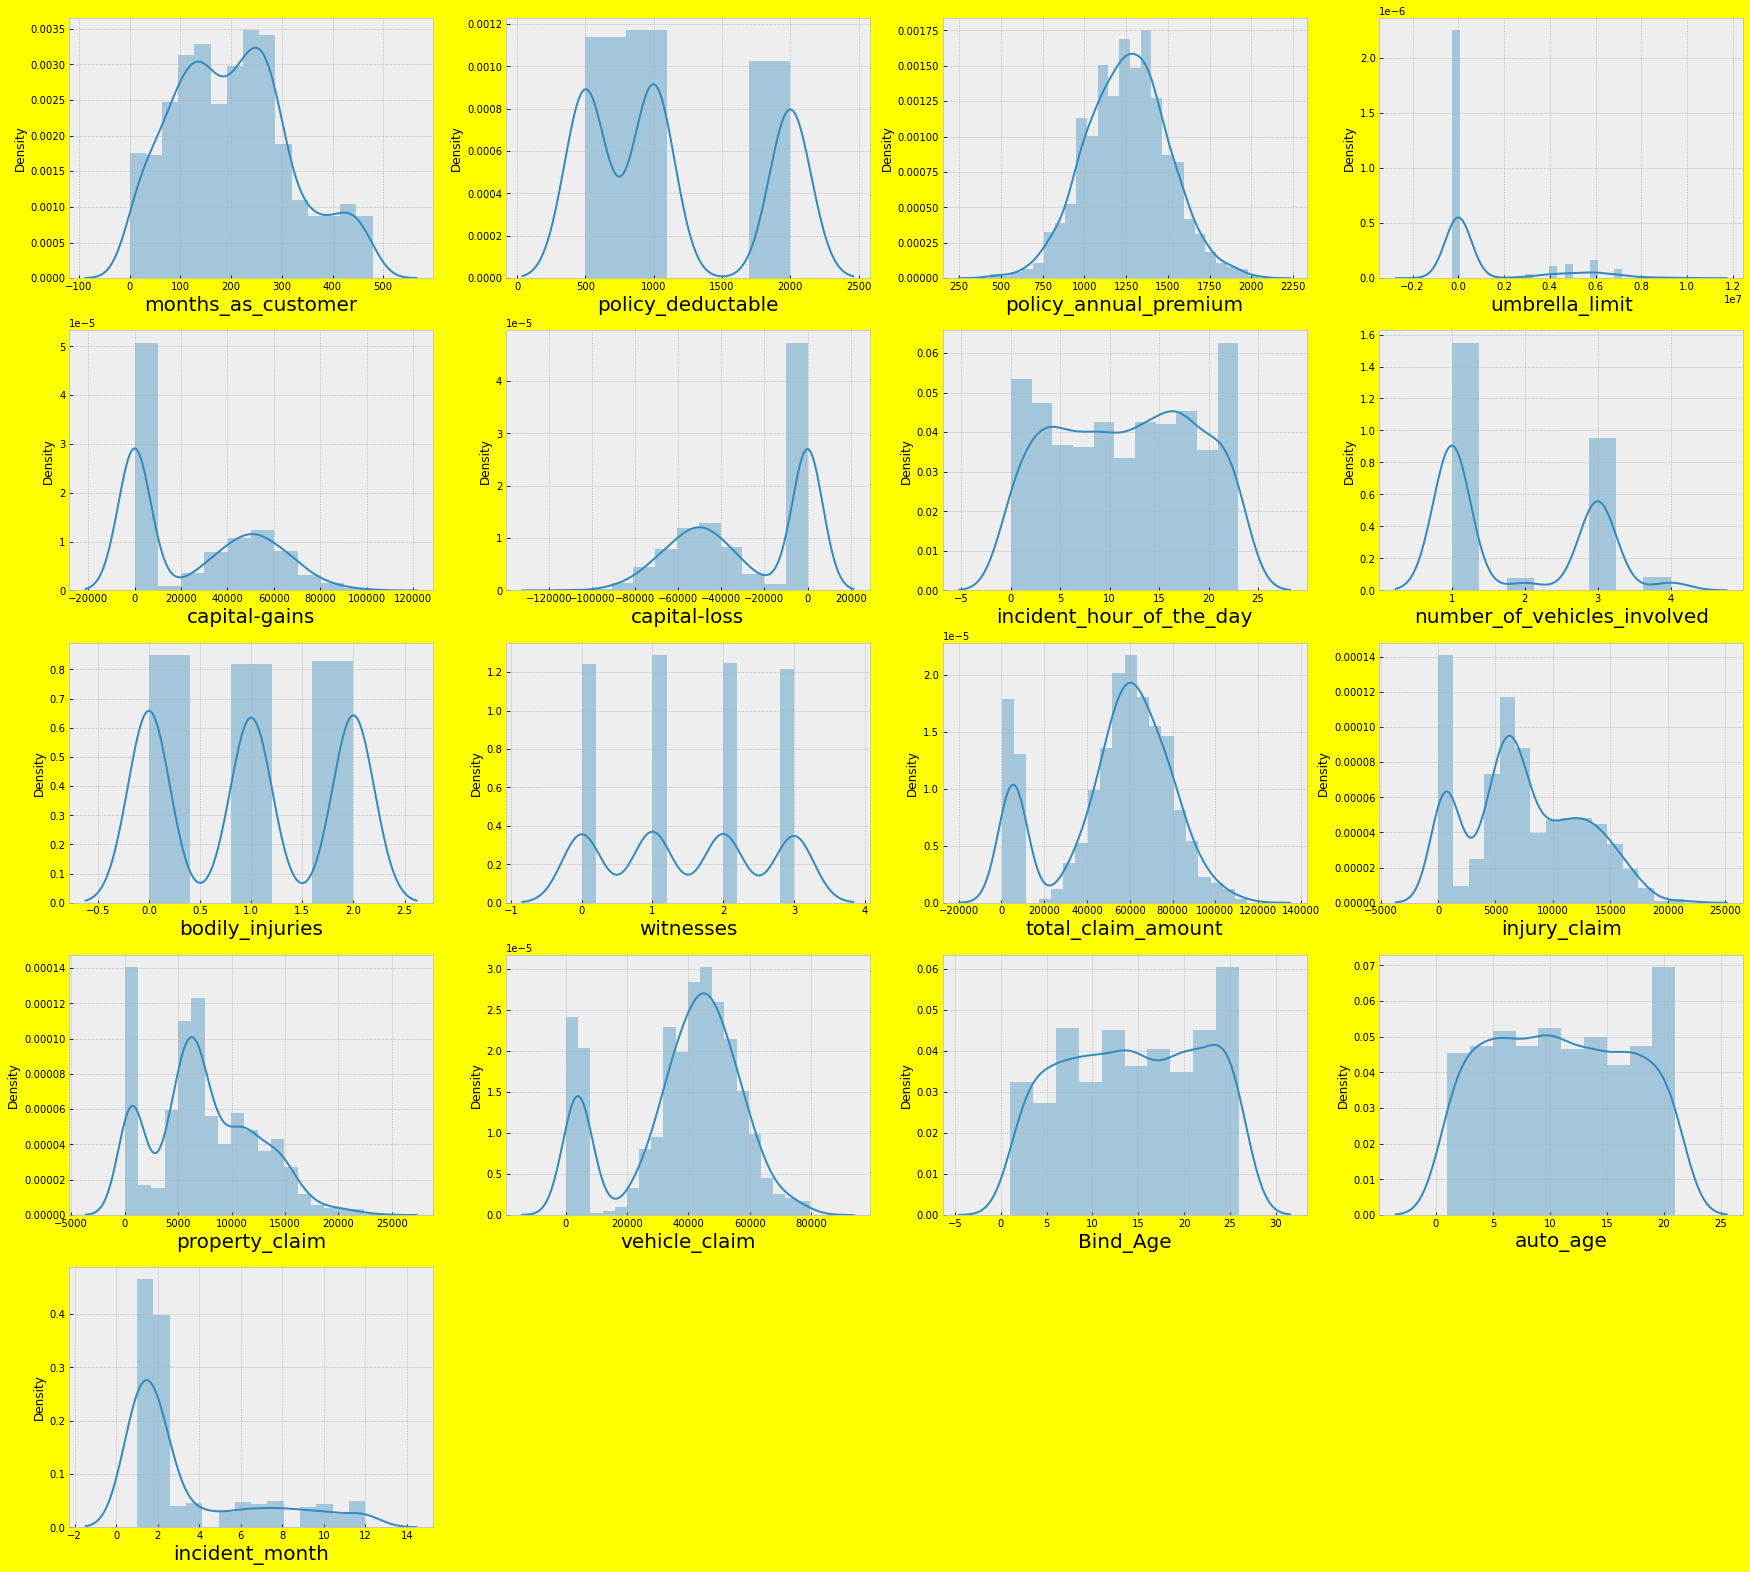

In [107]:
#Multivariate Analysis
plt.figure(figsize=(30,45),facecolor='yellow')
plotnum=1
for col in IFP[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(IFP[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

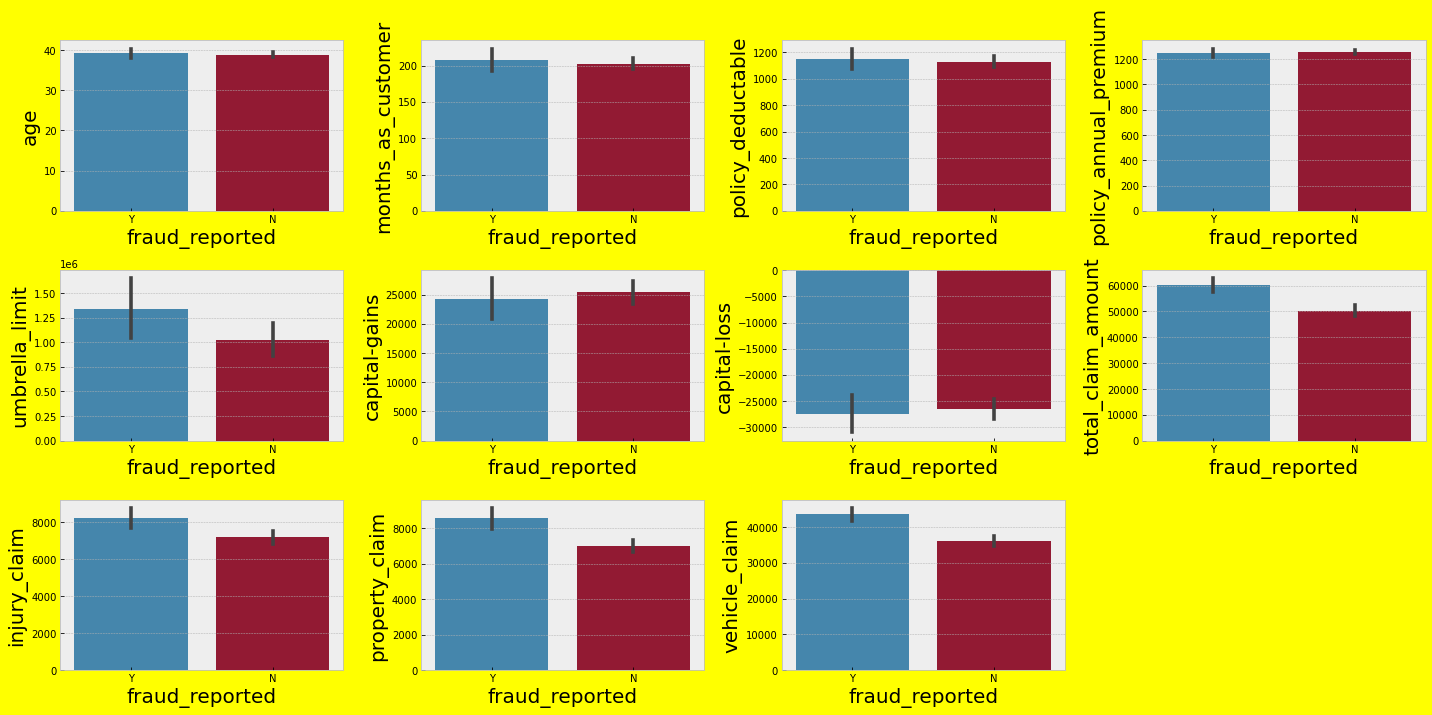

In [108]:
#Interpreting Relationship between Dependent Variable and Independent Variables
#'Income' vs Continuous/Discrete Data Columns
plt.figure(figsize=(20,25),facecolor='yellow')
plotnum=1
y = IFP['fraud_reported']
X = IFP[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in X:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

'age','months_as_customer','policy_deductable','policy_annual_premium','capital-gains','capital-loss', don't seem to contribute to fraud probability.

1.Higher the umbrella limit, more the fraud claims are filed.


2.Higher the total claim amount, more the fraud claims are filed.


3.Higher the injury claim amount, more the fraud claims are filed.


4.Higher the property claim amount, more the fraud claims are filed.


5.Higher the vehicle claim amount, more the fraud claims are filed.


Text(0.5, 1.0, ' fraud_reported density ')

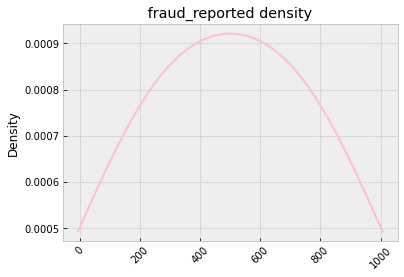

In [109]:
IFP['fraud_reported'].value_counts(ascending = False).head(30).plot(kind = 'kde', color='pink')
plt.xticks(rotation = 45);
plt.title(' fraud_reported density ')

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

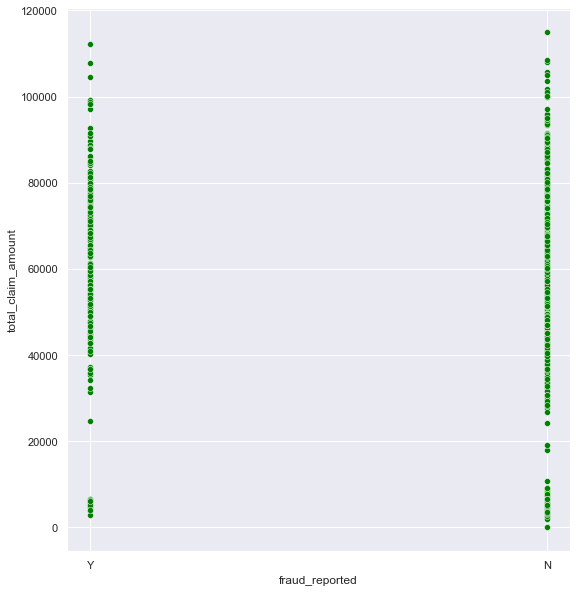

In [110]:
sns.set(rc={"figure.figsize":(9, 10)})
sns.scatterplot(data=IFP, x='fraud_reported',  y='total_claim_amount', color ='green')

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

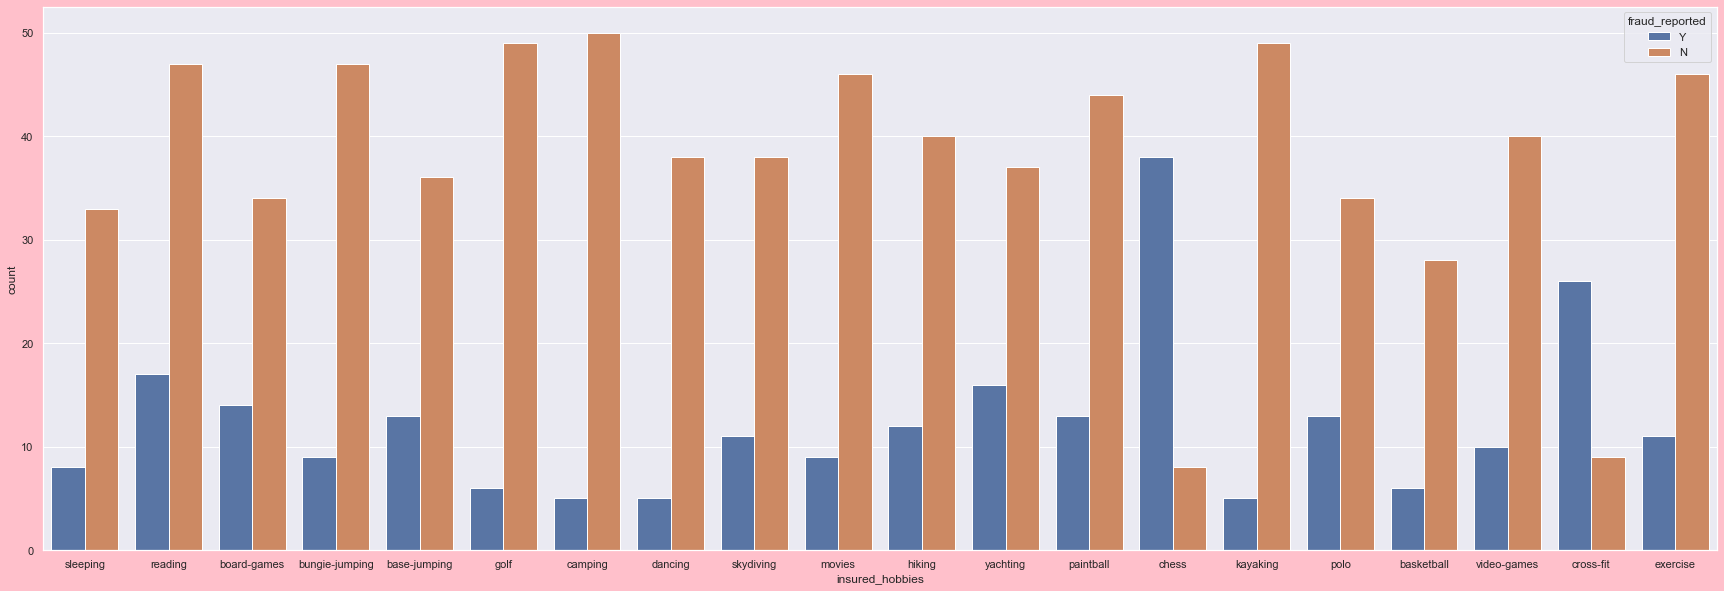

In [111]:
plt.figure(figsize=(30,10),facecolor='pink')
sns.countplot(IFP.insured_hobbies,hue =IFP.fraud_reported)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

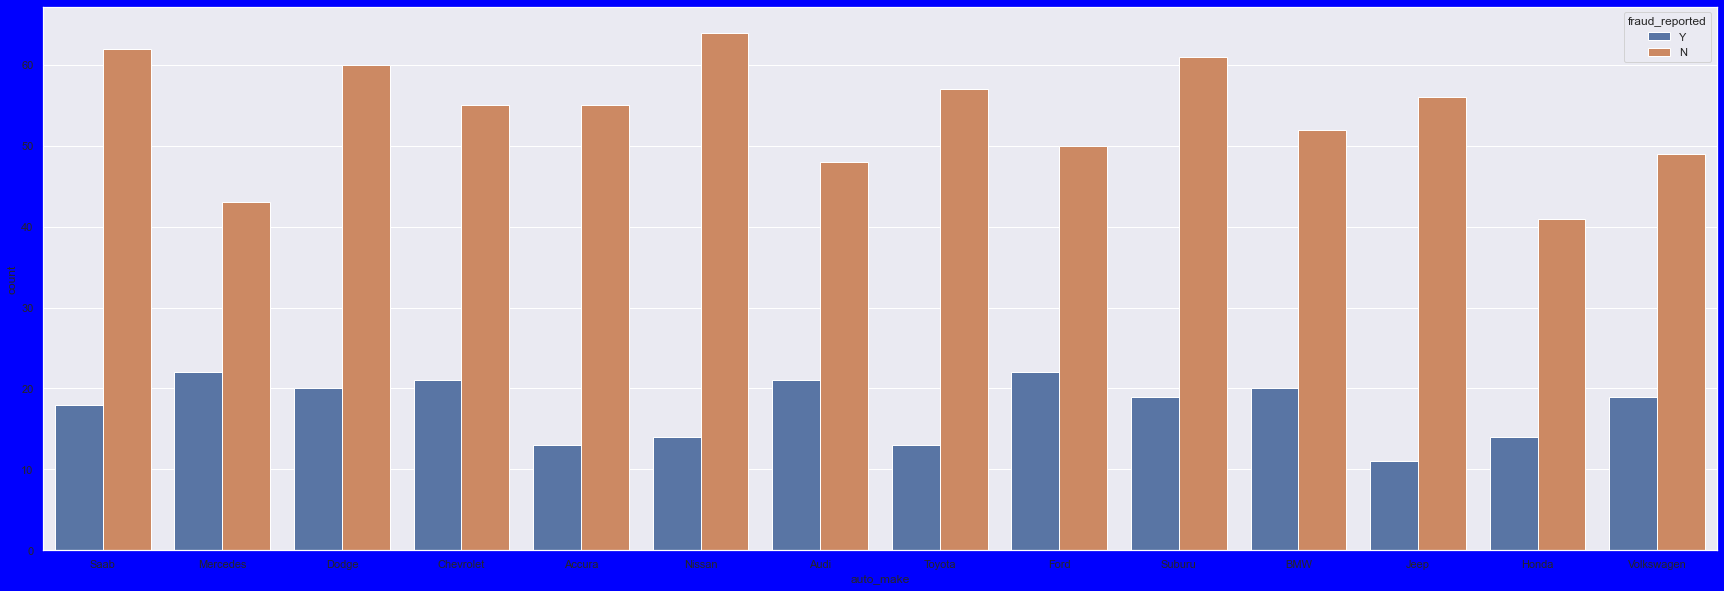

In [112]:
plt.figure(figsize=(30,10),facecolor='blue')
sns.countplot(IFP.auto_make,hue =IFP.fraud_reported)

# Correlation Analysis

In [113]:
IFP.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
_c39                                        NaN       NaN            NaN   
incident_month                         0.024659  0.023404      -0.042512   
Bind_Age                               0.048276  0.037444       0.040099   
auto_age                               0.000292 -0.001354       0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
_c39                                       NaN                    NaN   
incident_month                       -0.006418               0.021559   
Bind_Age                              0.049598              -0.001249   
auto_age                             -0.026105               0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   

Text(0.5, 1.0, 'Correlation matrix')

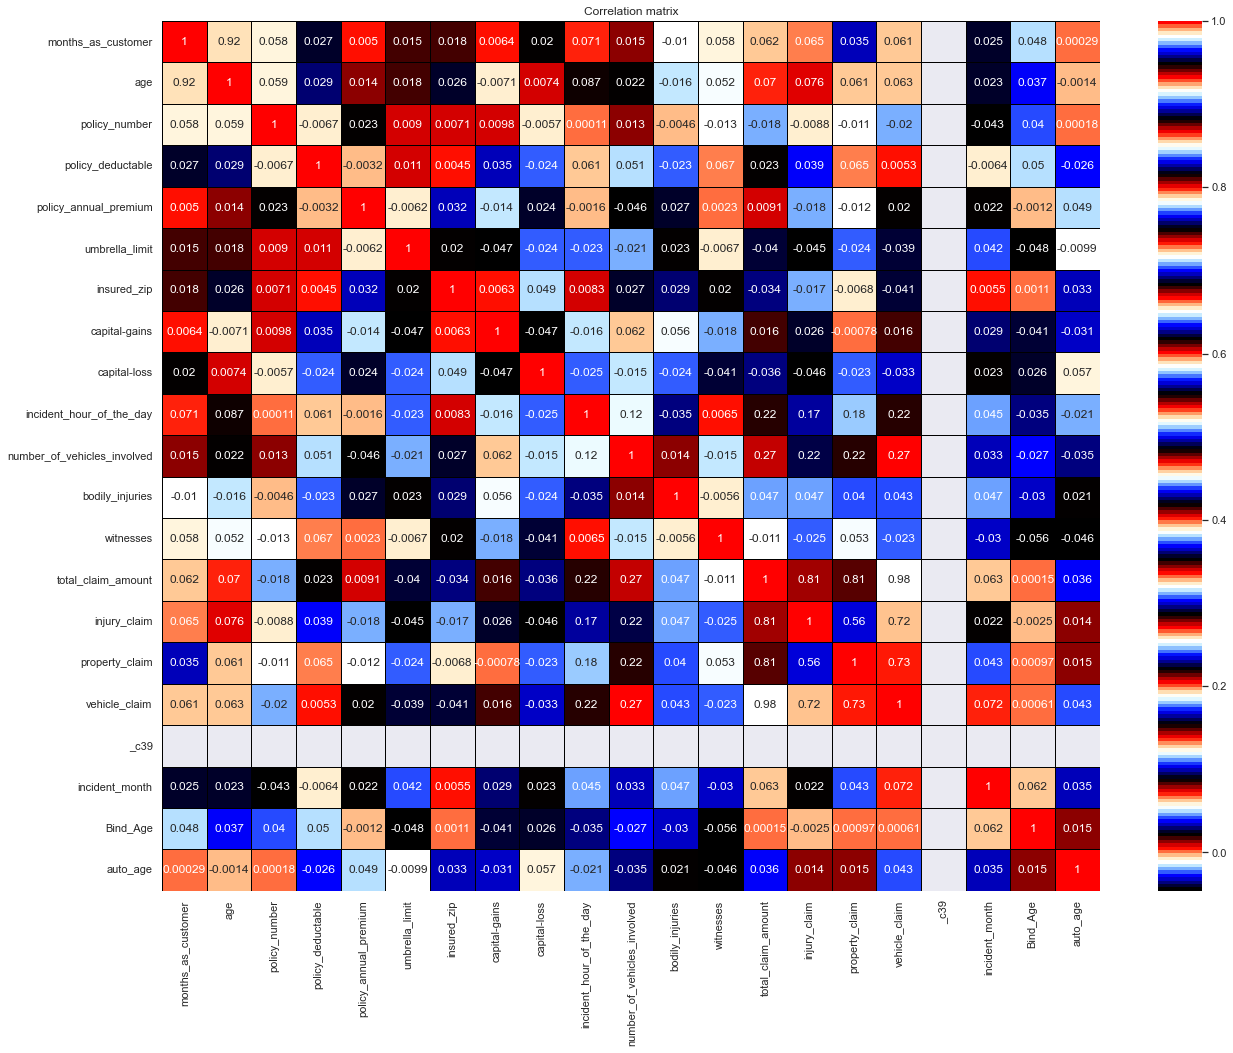

In [114]:
#Correalation using the Heatmap
plt.figure(figsize=(21,16))
sns.heatmap(IFP.corr(), annot =True, cmap='flag_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

# OUTLIERS

In [115]:
IFP.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
_c39                                NaN
incident_month                 1.375894
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

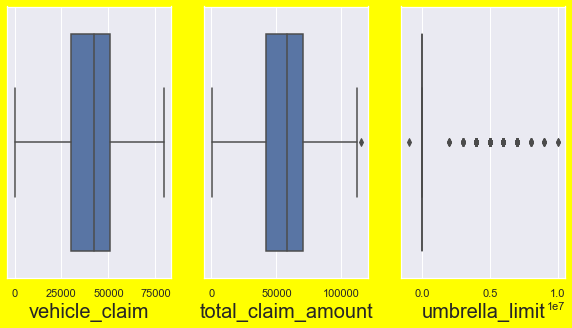

In [116]:
#Checking for Outliers in columns with continuous distribution
plt.figure(figsize=(10,5),facecolor='yellow')
plotnum=1
for col in IFP[['vehicle_claim','total_claim_amount','umbrella_limit','capital-loss']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(IFP[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

<AxesSubplot:xlabel='months_as_customer'>

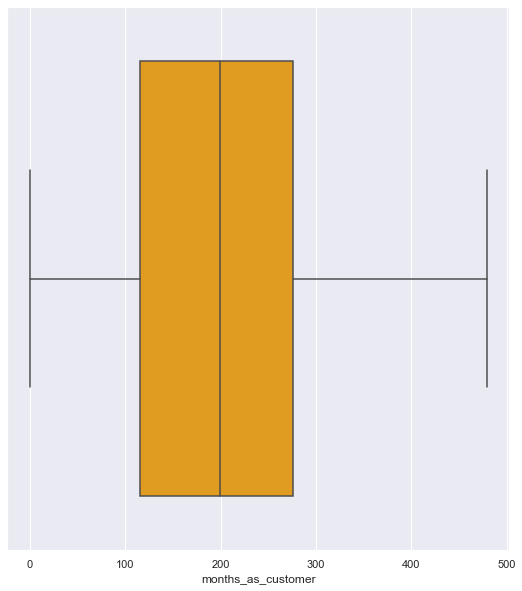

In [117]:
sns.boxplot(IFP['months_as_customer'] , color='orange')

<AxesSubplot:xlabel='age'>

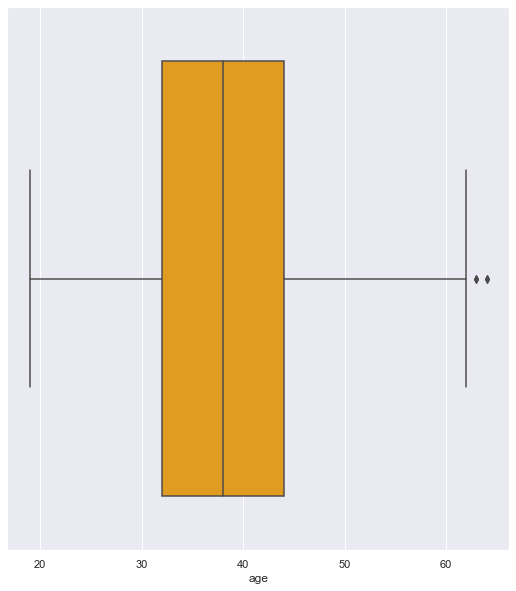

In [118]:
sns.boxplot(IFP['age'] , color='orange')

<AxesSubplot:xlabel='policy_number'>

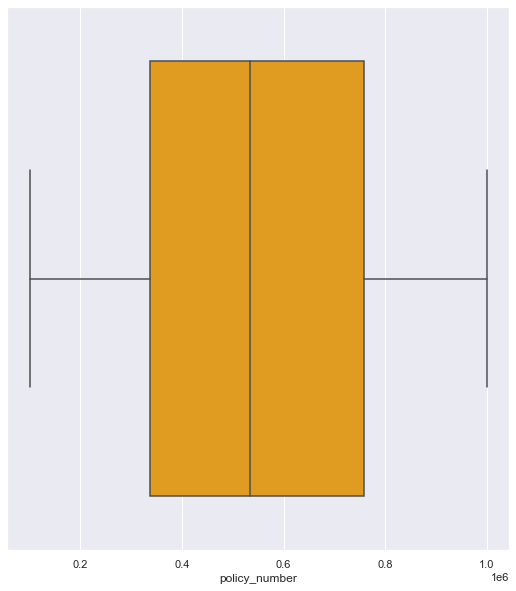

In [119]:
sns.boxplot(IFP['policy_number'] , color='orange')

<AxesSubplot:xlabel='policy_deductable'>

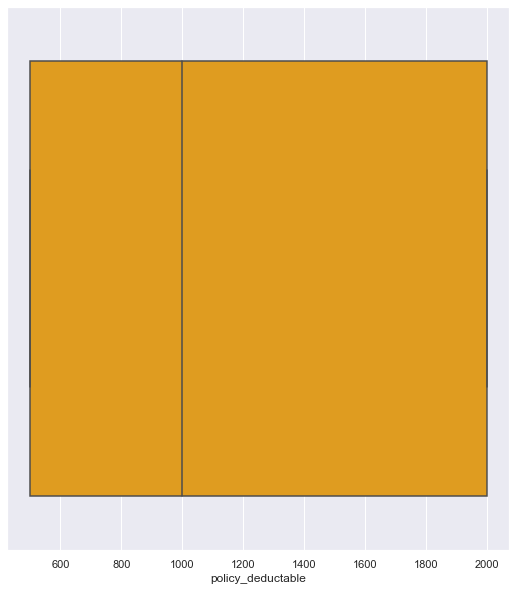

In [120]:
sns.boxplot(IFP['policy_deductable'] , color='orange')

<AxesSubplot:xlabel='policy_annual_premium'>

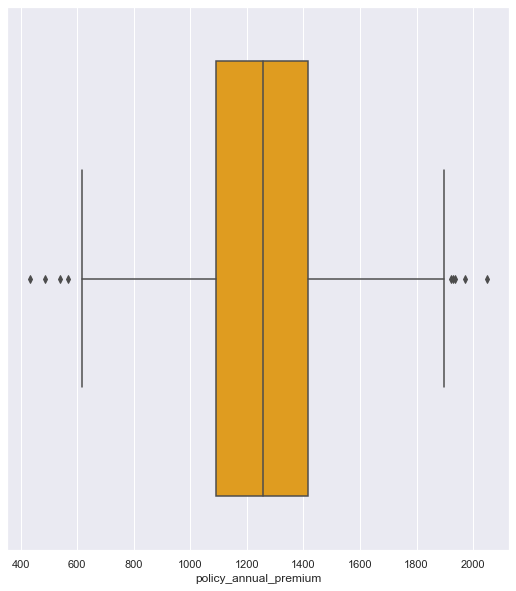

In [121]:
sns.boxplot(IFP['policy_annual_premium'] , color='orange')

<AxesSubplot:xlabel='umbrella_limit'>

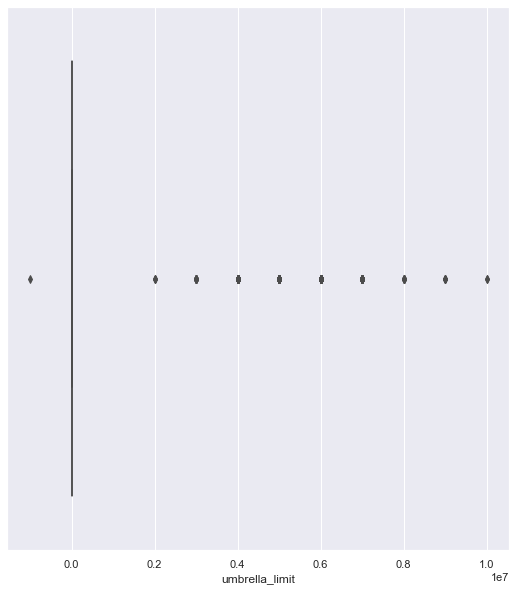

In [122]:
sns.boxplot(IFP['umbrella_limit'] , color='orange')

<AxesSubplot:xlabel='insured_zip'>

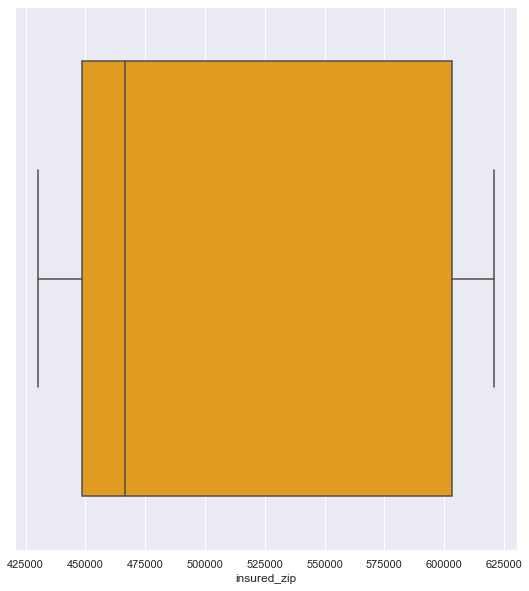

In [123]:
sns.boxplot(IFP['insured_zip'] , color='orange')

<AxesSubplot:xlabel='capital-gains'>

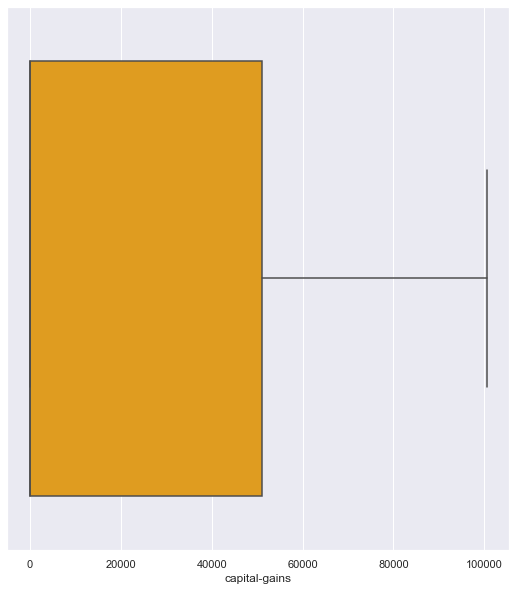

In [124]:
sns.boxplot(IFP['capital-gains'] , color='orange')

<AxesSubplot:xlabel='capital-loss'>

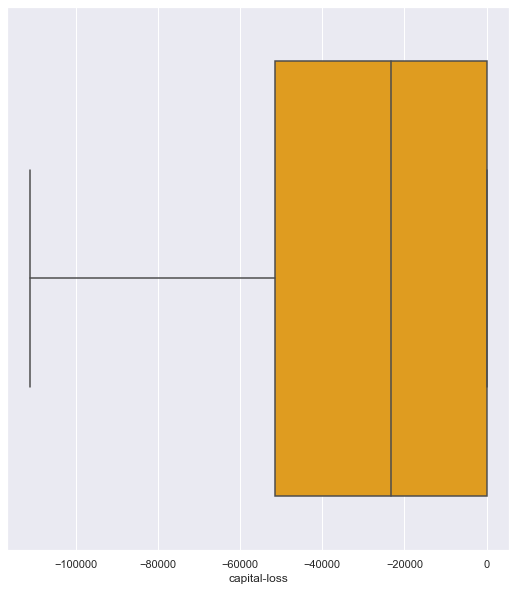

In [125]:
sns.boxplot(IFP['capital-loss'] , color='orange')

<AxesSubplot:xlabel='incident_hour_of_the_day'>

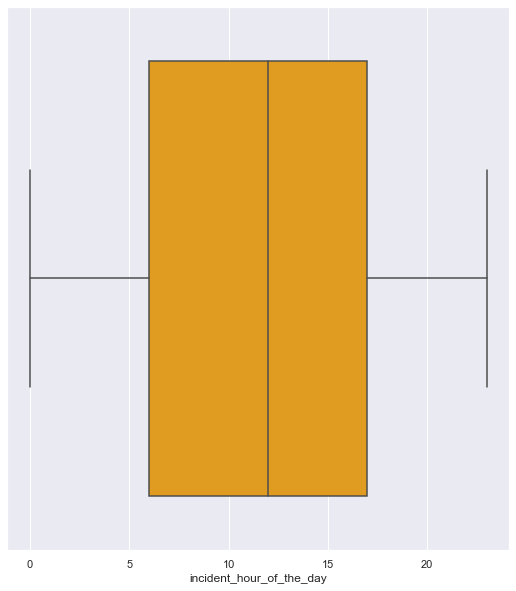

In [126]:
sns.boxplot(IFP['incident_hour_of_the_day'] , color='orange')

<AxesSubplot:xlabel='number_of_vehicles_involved'>

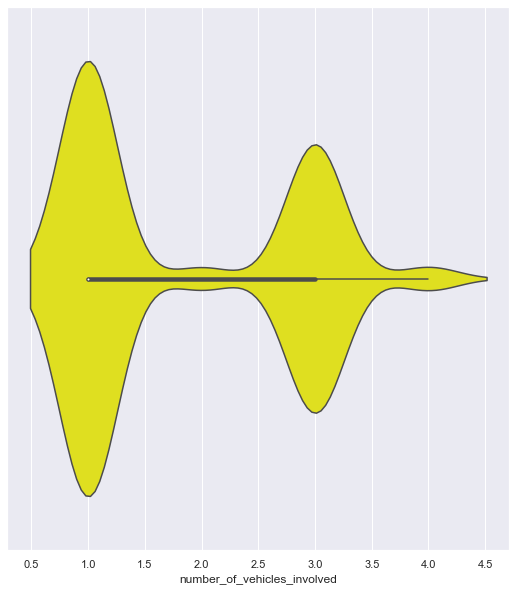

In [127]:
sns.violinplot(IFP['number_of_vehicles_involved'] , color='yellow')

<AxesSubplot:xlabel='bodily_injuries'>

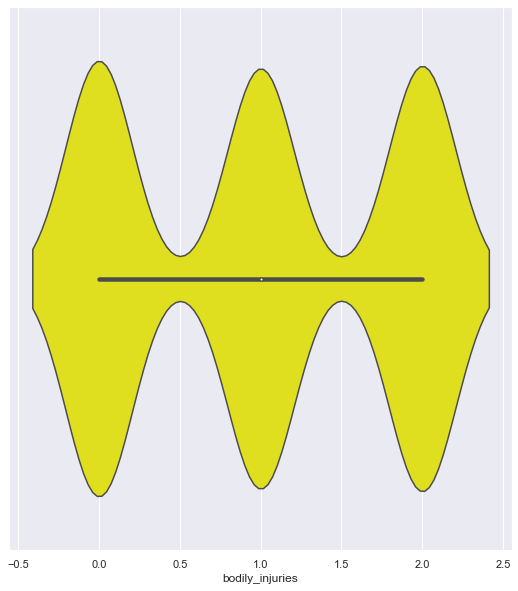

In [128]:
sns.violinplot(IFP['bodily_injuries'] , color='yellow')

<AxesSubplot:xlabel='witnesses'>

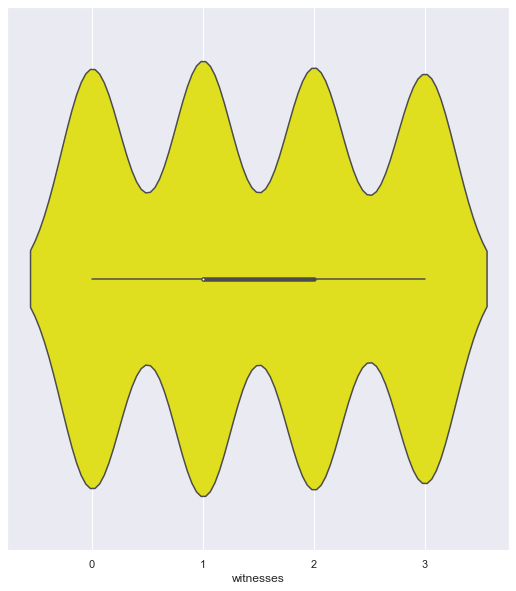

In [129]:
sns.violinplot(IFP['witnesses'] , color='yellow')

<AxesSubplot:xlabel='total_claim_amount'>

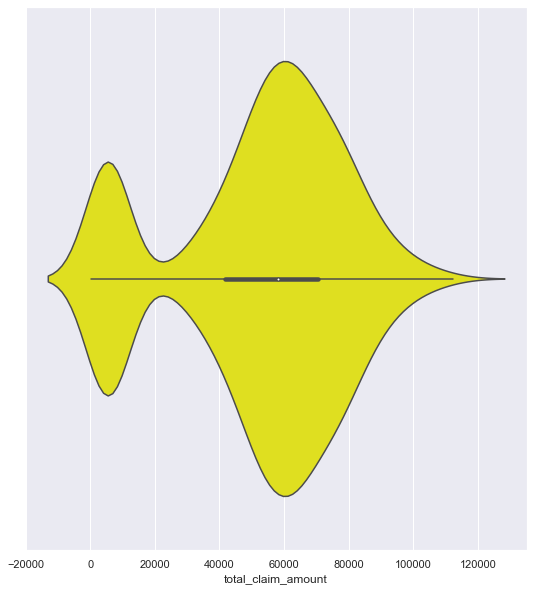

In [130]:
sns.violinplot(IFP['total_claim_amount'] , color='yellow')

<AxesSubplot:xlabel='injury_claim'>

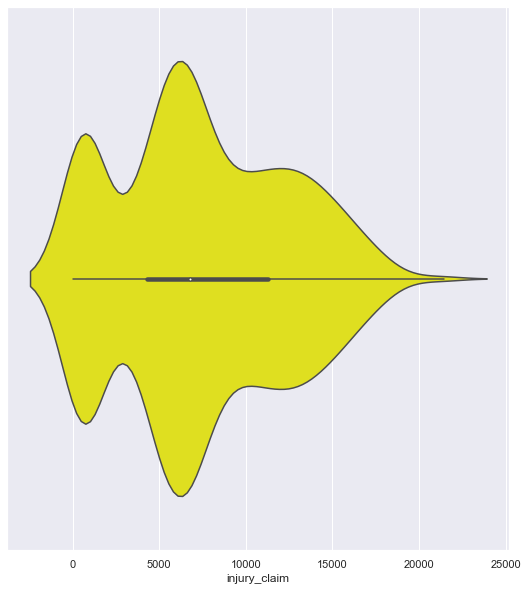

In [131]:
sns.violinplot(IFP['injury_claim'] , color='yellow')

<AxesSubplot:xlabel='property_claim'>

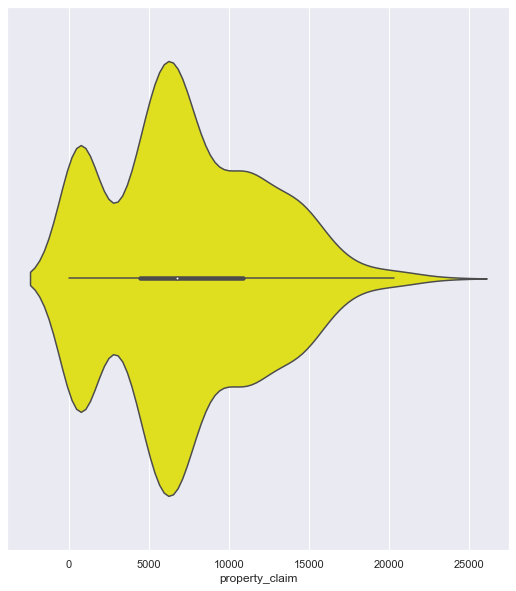

In [132]:
sns.violinplot(IFP['property_claim'] , color='yellow')

<AxesSubplot:xlabel='vehicle_claim'>

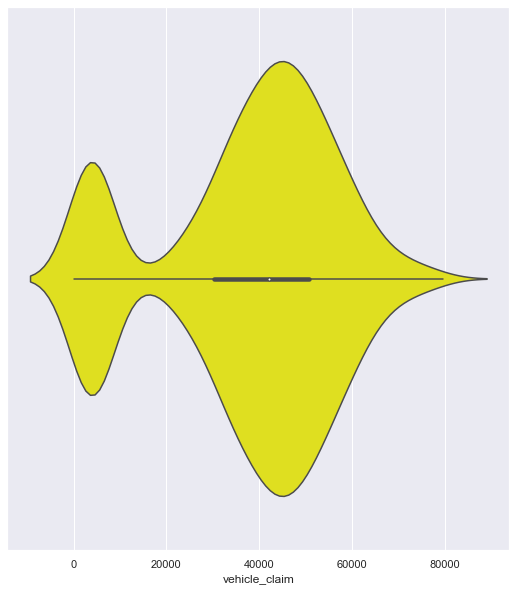

In [133]:
sns.violinplot(IFP['vehicle_claim'] , color='yellow')

<AxesSubplot:xlabel='_c39'>

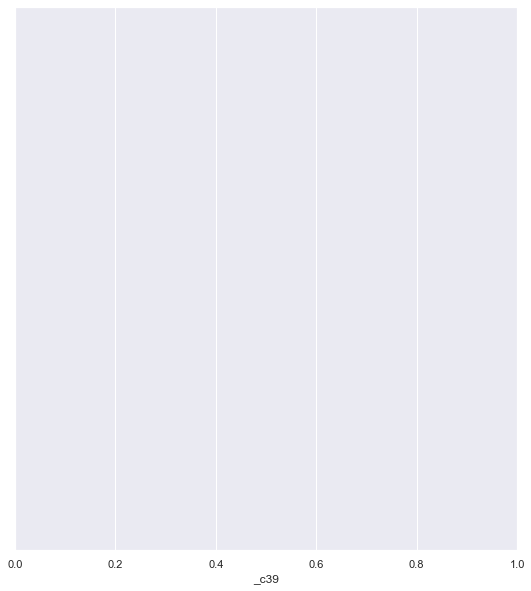

In [134]:
sns.violinplot(IFP['_c39'] , color='yellow')

<AxesSubplot:xlabel='incident_month'>

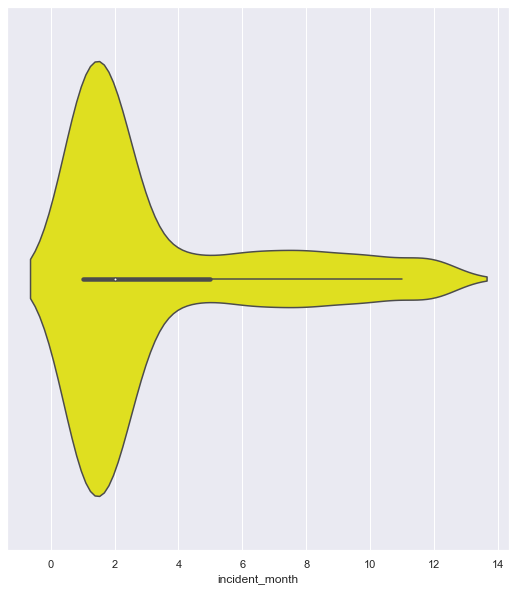

In [135]:
sns.violinplot(IFP['incident_month'] , color='yellow')

<AxesSubplot:xlabel='Bind_Age'>

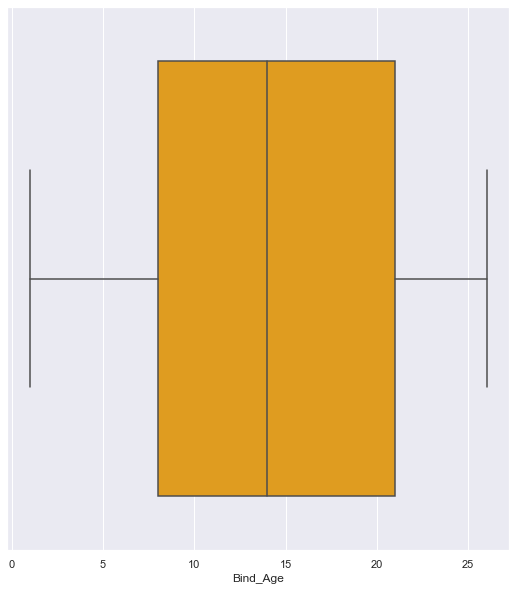

In [136]:
sns.boxplot(IFP['Bind_Age'] , color='orange')

<AxesSubplot:xlabel='auto_age'>

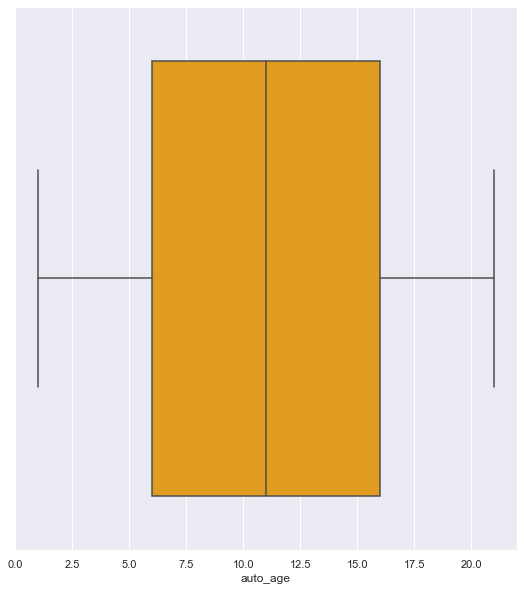

In [137]:
sns.boxplot(IFP['auto_age'] , color='orange')

# considerable outliers are not present in the columns

In [138]:
#Checking for Skewness in Data
IFP.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
_c39                                NaN
incident_month                 1.375894
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

# Reducing skewness using PowerTransformer

In [139]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
IFP4 = IFP[['vehicle_claim','total_claim_amount']]
transformed= powtrans.fit_transform(IFP4)
transformed = pd.DataFrame(transformed, columns=IFP4.columns) #to convert numpy array back into dataframe
transformed.skew()

vehicle_claim        -0.522718
total_claim_amount   -0.510354
dtype: float64

In [140]:
transformed.index = IFP.index
IFP[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]
IFP

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... injury_claim property_claim vehicle_claim   auto_make  \
0          MALE  ...         6510          13020      0.753697        Saab   
1          MALE  ...          780            780     -1.786629    Mercedes   
2        FEMALE  ...         7700           3850     -0.820881       Dodge   
3        FEMALE  ...         6340           6340      0.677602   Chevrolet   
4          MALE  ...         1300            650     -1.740038      Accura   
..          ...  ...          ...            ...           ...         ...   
995      FEMALE  ...        17440           8720      1.259186       Honda   
996      FEMALE  ...        18080          18080      1.904757  Volkswagen   
997      FEMALE  ...         7500           7500      0.777232      Suburu   
998        MALE  ...         5220           5220     -0.104258        Audi   
999      FEMALE  ...          460            920     -1.779087    Mercedes   

     auto_model  fraud_reported _c39 incident_month Bind_Age auto_age  
0           92x               Y  NaN              1        2       12  
1          E400               Y  NaN              1       10        9  
2           RAM               N  NaN              2       16        9  
3         Tahoe               Y  NaN             10       26        2  
4           RSX               N  NaN              2        2        7  
..          ...             ...  ...            ...      ...      ...  
995      Accord               N  NaN              2       25       10  
996      Passat               N  NaN              1        2        1  
997     Impreza               N  NaN              1       13       20  
998          A5               N  NaN              2        5       18  
999        E400               N  NaN              2       20        9  

[1000 rows x 40 columns]

# Encoding the categorical Feature Columns.

In [141]:
IFP.dtypes[IFP.dtypes == 'object'] #Identifying the Categorical Columns

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [142]:
IFP.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                   

In [143]:
IFP['insured_sex'] = IFP.insured_sex.map({'MALE':1,'FEMALE':2})
IFP['police_report_available'] = IFP.property_damage.map({'YES':2,'NO':1})
IFP['property_damage'] = IFP.property_damage.map({'YES':2,'NO':1})

In [144]:
#Encoding the categorical data using Label Encoding Technique

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categ = ['authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_education_level','policy_csl','policy_state']
for col in categ:
    IFP[col] = le.fit_transform(IFP[col])
IFP['auto_make']= le.fit_transform(IFP['auto_make'])
IFP.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                 328   48         521585             2           1   
1                 228   42         342868             1           1   
2                 134   29         687698             2           0   
3                 256   41         227811             0           1   
4                 228   44         367455             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  ...  injury_claim property_claim vehicle_claim  auto_make  \
0            1  ...          6510          13020      0.753697         10   
1            1  ...           780            780     -1.786629          8   
2            2  ...          7700           3850     -0.820881          4   
3            2  ...          6340           6340      0.677602          3   
4            1  ...          1300            650     -1.740038          0   

   auto_model  fraud_reported  _c39  incident_month  Bind_Age  auto_age  
0         92x               Y   NaN               1         2        12  
1        E400               Y   NaN               1        10         9  
2         RAM               N   NaN               2        16         9  
3       Tahoe               Y   NaN              10        26         2  
4         RSX               N   NaN               2         2         7  

[5 rows x 40 columns]

In [145]:
#Encoding the Label Column.
IFP['fraud_reported'] = IFP.fraud_reported.map({'Y':1,'N':0}) #'Y' = 1 and 'N' = 0
IFP.dtypes[IFP.dtypes == 'object'] #Identifying the Categorical Columns

insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
incident_location     object
auto_model            object
dtype: object

In [149]:
#encoding above columns using get_dummies()

IFP2 = IFP[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()

In [150]:
dumm = pd.get_dummies(IFP[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)

In [151]:
dumm.columns

Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

In [152]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()



In [153]:

IFP = IFP.join(dumm2)

In [154]:

IFP.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

In [155]:
IFP

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  auto_model_Camry  auto_model_RSX  auto_model_RAM  \
0              1  ...                 0               0               0   
1              1  ...                 0               0               0   
2              2  ...                 0               0               1   
3              2  ...                 0               0               0   
4              1  ...                 0               1               0   
..           ...  ...               ...             ...             ...   
995            2  ...                 0               0               0   
996            2  ...                 0               0               0   
997            2  ...                 0               0               0   
998            1  ...                 0               0               0   
999            2  ...                 0               0               0   

     auto_model_A5  auto_model_Jetta  auto_model_ML350  auto_model_Passat  \
0                0                 0                 0                  0   
1                0                 0                 0                  0   
2                0                 0                 0                  0   
3                0                 0                 0                  0   
4                0                 0                 0                  0   
..             ...               ...               ...                ...   
995              0                 0                 0                  0   
996              0                 0                 0                  1   
997              0                 0                 0                  0   
998              1                 0                 0                  0   
999              0                 0                 0                  0   

     auto_model_F150 auto_model_A3  auto_model_3 Series  
0                  0             0                    0  
1                  0             0                    0  
2                  0             0                    0  
3                  0             0                    0  
4                  0             0                    0  
..               

In [146]:
#Finding Correlation
i_corr =IFP.corr()
i_corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                           -0.060925 -0.073337      -0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available                0.005488 -0.003408      -0.019923   
total_claim_amount                     0.062495  0.070386      -0.018536   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061308  0.062764      -0.020981   
auto_make                              0.047655  0.030410       0.023860   
fraud_reported                         0.020544  0.012143      -0.029443   
_c39                                        NaN       NaN            NaN   
incident_month                         0.024659  0.023404      -0.042512   
Bind_Age                               0.048276  0.037444       0.040099   
auto_age                               0.000292 -0.001354       0.000183   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.000328   -0.026819           0.026807   
age                             -0.014533   -0.015185           0.029188   
policy_number                    0.072815    0.038917          -0.006738   
policy_state                     1.000000    0.001027           0.010033   
policy_csl                       0.001027    1.000000           0.003384   
policy_deductable                0.010033    0.003384           1.000000   
policy_annual_premium            0.012455    0.023978          -0.003245   
umbrella_limit                  -0.029580    0.021636           0.010870   
insured_zip                      0.008777    0.006879           0.004545   
insured_sex                      0.020481    0.010757           0.009733   
insured_education_level         -0.034327    0.009153           0.015217   
insured_relationship            -0.018506   -0.030063          -0.022945   
capital-gains                    0.074551    0.005249           0.035212   
capital-loss                    -0.030338   -0.034612          -0.023544   
incident_type                    0.031848    0.011997          -0.038411   
collision_type                   0.052438    0.020641          -0.053912   
incident_severity               -0.026377    0.022530          -0.015711   


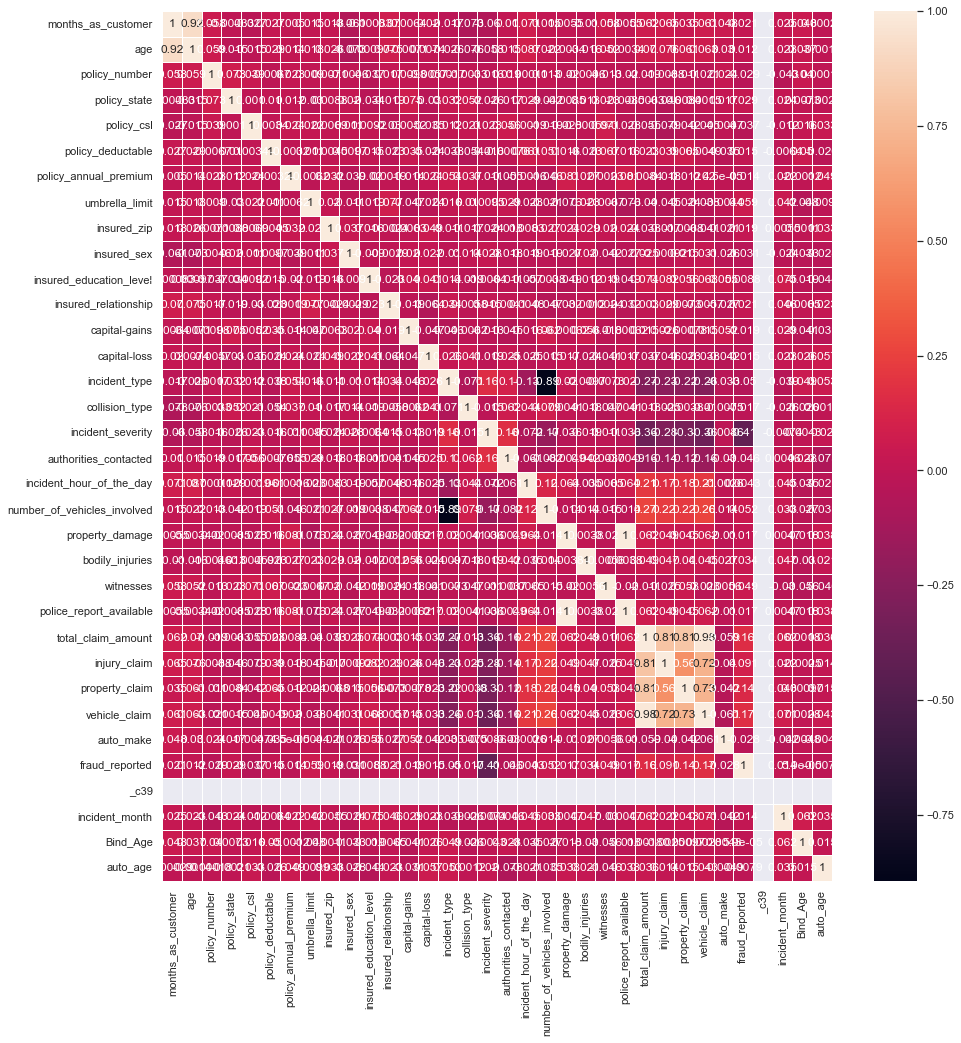

In [156]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

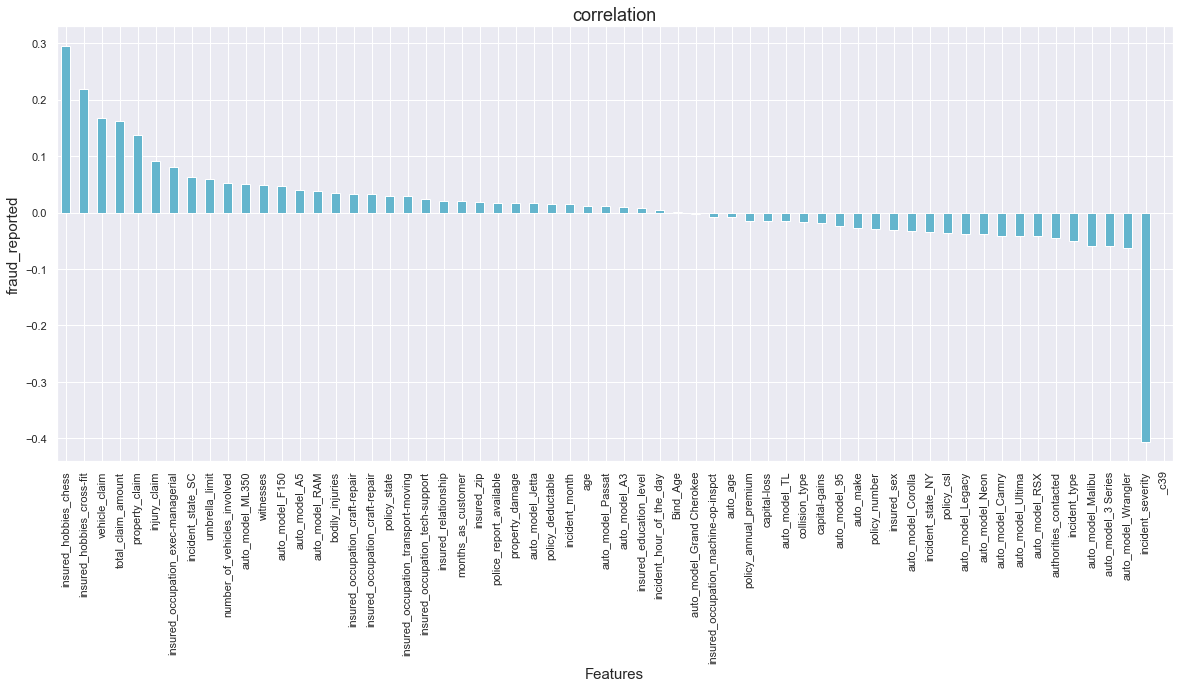

In [157]:
#Visualizing correlation of feature columns with label column.
plt.figure(figsize = (20,8))
IFP.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [158]:
#Feature Scaling
#using Standard Scaler

from sklearn.preprocessing import StandardScaler

In [160]:
X = IFP.drop(columns = ['fraud_reported'])
y = IFP['fraud_reported']

In [163]:
X.shape

(1000, 63)

In [164]:
y.shape

(1000,)

In [165]:
X

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  auto_model_Camry  auto_model_RSX  auto_model_RAM  \
0              1  ...                 0               0               0   
1              1  ...                 0               0               0   
2              2  ...                 0               0               1   
3              2  ...                 0               0               0   
4              1  ...                 0               1               0   
..           ...  ...               ...             ...             ...   
995            2  ...                 0               0               0   
996            2  ...                 0               0               0   
997            2  ...                 0               0               0   
998            1  ...                 0               0               0   
999            2  ...                 0               0               0   

     auto_model_A5  auto_model_Jetta  auto_model_ML350  auto_model_Passat  \
0                0                 0                 0                  0   
1                0                 0                 0                  0   
2                0                 0                 0                  0   
3                0                 0                 0                  0   
4                0                 0                 0                  0   
..             ...               ...               ...                ...   
995              0                 0                 0                  0   
996              0                 0                 0                  1   
997              0                 0                 0                  0   
998              1                 0                 0                  0   
999              0                 0                 0                  0   

     auto_model_F150 auto_model_A3  auto_model_3 Series  
0                  0             0                    0  
1                  0             0                    0  
2                  0             0                    0  
3                  0             0                    0  
4                  0             0                    0  
..               

In [167]:
#Building base model
from sklearn.model_selection import train_test_split

In [168]:
from sklearn.metrics import r2_score, mean_absolute_error

In [170]:
#Checking for the best Random state to remove bais among the models
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

ValueError: could not convert string to float: '6456 Andromedia Drive'